## **8th Annual WiDS Datathon Challenges:** 

### **Unraveling the Mysteries of the Female Brain**

# MODELLING

* [0. Imports](#0-imports)
* [1. Logistic Regression](#1-logistic-regression)
* [2. Random Forest](#2-random-forest)
* [3. XGBoost](#3-xgboost)
* [4. SVM](#4-svm)
* [5. Neural Network](#5-neural-network)

What the question asks:

- Brain activity patterns associated with ADHD.

- How these patterns might differ between males and females.

- The focus is on MRI data — the key dataset seems to be the functional MRI connectome matrices, which represent brain activity.

Evaluation

The F1 score is the harmonic mean of the precision and recall. It thus symmetrically represents both precision and recall in one metric. The highest possible value of an F-score is 1.0, indicating perfect precision and recall, and the lowest possible value is 0, if precision and recall are zero.


Since the theme of this challenge is to uncover gender inequities and because ADHD diagnosis is harder for females to predict, for the purposes of this competition we are assigning 2x weight to Female ADHD cases (ADHD_Outcome=1, Sex_F=1). In our implementation of the F1 Score, weighted F1 Score is calculated on each column, and those two individual scores are averaged to get the final Kaggle leaderboard score.

Submission Format

For every participant (i.e. row) in the test dataset (test_tsv), submission files should contain three columns: participant_id and ADHD_Outcome and Sex_F. participant_id should be an integer and ADHD_Outcome and Sex_F should both be a real value. For each row, these three values should be separated by a comma.

The file should contain a header and have the following format:

    participant_id,ADHD_Outcome,Sex_F
    v1nMpCoLGU0V, 1, 1
    uEZHGukIUQ0k, 0, 1
    IbF3zW0Wbx4Q, 0, 0

## Algorithms for Imbalanced Datasets

* When dealing with imbalanced datasets, it's crucial to select algorithms that are robust to class imbalances or have built-in mechanisms to handle them. 
* Tree-based models (Random Forest, XGBoost) and neural networks are strong contenders, given the high dimensionality of MRI data.
* Because we have two target variables, we need to use algorithms that support multi output.

---

**Logistic Regression (with regularization):**

- fitting a multi-output logistic regression model where both ADHD_Outcome and Sex_F are predicted simultaneously. 

**Random Forest Classifier (with class weights):**

- Random Forest is a robust model that can handle high-dimensional data and works well for classification tasks. You can set the class_weight parameter to handle imbalanced classes, and it also provides feature importance metrics.

- You can use RandomForestClassifier from sklearn and set the n_estimators, max_depth, and class_weight parameters to control model complexity and handle the class imbalance.

**Gradient Boosting (XGBoost, LightGBM, or CatBoost):**

- Gradient boosting methods like XGBoost or LightGBM are powerful for high-dimensional classification tasks. They can be used with the multi:softprob objective to predict multiple outputs.

- These models have options to incorporate class weights to help mitigate the imbalance, and they also provide excellent performance in practice for large datasets.

**Support Vector Machines (SVM):**

- Effective, particularly when tuned with class weights.

- Aims to find the optimal hyperplane, and class weights help adjust for imbalances.

**Neural Networks (Deep Learning):**

- A neural network can be another option, particularly if your data has complex patterns that simpler models cannot capture. You can build a multi-output neural network with a shared hidden layer to predict both outcomes.

**Important Considerations:**

* **Evaluation Metrics:**
    * Prioritize F1-score, AUC-ROC, and AUC-PR over accuracy.
* **Cross-Validation:**
    * Use stratified cross-validation for reliable model evaluation.
* **Hyperparameter Tuning:**
    * Carefully tune hyperparameters, especially those related to class weights or cost-sensitive learning.
* **Feature Engineering:**
    * Feature quality significantly impacts performance, regardless of the algorithm.


# 0. Imports

In [1]:
import sys
import re
import math
import openpyxl
import joblib

import numpy as np
import pandas as pd
import scipy
import scipy.stats as stats
from scipy.stats import uniform, randint

import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import plotly as py

import sklearn
from sklearn.preprocessing import (
    LabelEncoder,
    MinMaxScaler,
    OneHotEncoder,
    StandardScaler,
)
from sklearn.model_selection import (
    GridSearchCV,
    KFold,
    RandomizedSearchCV,
    StratifiedKFold,
    train_test_split,
)
from sklearn.decomposition import PCA
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import LassoCV, LogisticRegression
from sklearn.manifold import TSNE
from sklearn.metrics import (
    accuracy_score,
    classification_report,
    confusion_matrix,
    f1_score,
    multilabel_confusion_matrix,
    precision_score,
    recall_score,
    roc_auc_score,
    ConfusionMatrixDisplay,
    precision_recall_fscore_support,
    make_scorer
)
from sklearn.neighbors import LocalOutlierFactor
from sklearn.ensemble import (
    IsolationForest,
    RandomForestClassifier,
)
from sklearn.multioutput import MultiOutputClassifier
from sklearn.utils.class_weight import compute_sample_weight
from sklearn.svm import SVC

# Visualization of Confusion Matrices
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay

import scipy.stats as st
import statsmodels.stats.multitest as smm
import shap
import xgboost as xgb
from xgboost import XGBClassifier
import numpy as np
import pandas as pd
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, f1_score
from sklearn.model_selection import train_test_split


from xgboost import XGBClassifier
from sklearn.multioutput import MultiOutputClassifier
from sklearn.model_selection import RandomizedSearchCV
import scipy.stats as stats

import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import f1_score
from sklearn.pipeline import Pipeline
from xgboost import plot_importance
import matplotlib.pyplot as plt


import tensorflow as tf
import numpy as np
import pandas as pd
from sklearn.metrics import classification_report, confusion_matrix, f1_score
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau
from tensorflow.keras.utils import to_categorical
from sklearn.utils.class_weight import compute_class_weight
np.random.seed(42)  # For Numpy
tf.random.set_seed(42)  # For TensorFlow/Keras
import random


import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.layers import Input, Dense, BatchNormalization, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau
from tensorflow.keras.regularizers import l2
from tensorflow.keras.utils import to_categorical
from imblearn.over_sampling import SMOTE
from sklearn.metrics import classification_report, confusion_matrix, f1_score
import os
import random
import numpy as np
import tensorflow as tf

# Set random seeds for reproducibility
os.environ['PYTHONHASHSEED'] = str(42)
random.seed(42)
np.random.seed(42)
tf.random.set_seed(42)


import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, Dropout
from tensorflow.keras.regularizers import l2
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import classification_report, confusion_matrix, f1_score
from tensorflow.keras.layers import BatchNormalization
from sklearn.utils import class_weight
from tensorflow.keras.optimizers.schedules import ExponentialDecay
import tensorflow.keras.backend as K

import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, Dropout
from tensorflow.keras.regularizers import l2
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import classification_report, confusion_matrix, f1_score
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.callbacks import ModelCheckpoint

import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import classification_report

from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.multioutput import MultiOutputClassifier
from sklearn.metrics import make_scorer
import numpy as np

import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.layers import Input, Dense, BatchNormalization, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau
from tensorflow.keras.regularizers import l2
from tensorflow.keras.utils import to_categorical
from imblearn.over_sampling import SMOTE
from sklearn.metrics import classification_report, confusion_matrix, f1_score


#from imblearn.over_sampling import SMOTE

print(f"python version: {sys.version}")
print(f"pandas version: {pd.__version__}")
print(f"numpy version: {np.__version__}")
print(f"matplotlib version: {matplotlib.__version__}")
print(f"seaborn version: {sns.__version__}")
print(f"plotly version: {py.__version__}")
print(f"scikit-learn version: {sklearn.__version__}")
print(f"scipy version: {scipy.__version__}")

python version: 3.11.11 (main, Dec 11 2024, 10:25:04) [Clang 14.0.6 ]
pandas version: 2.2.3
numpy version: 1.26.4
matplotlib version: 3.10.0
seaborn version: 0.13.2
plotly version: 5.24.1
scikit-learn version: 1.5.2
scipy version: 1.15.2


In [2]:
# Import feature splits
X_train = pd.read_csv("../data/processed/model/X_train.csv")
X_test = pd.read_csv("../data/processed/model/X_test.csv")

# Import combined targets
y_train = pd.read_csv("../data/processed/model/y_train.csv")
y_test = pd.read_csv("../data/processed/model/y_test.csv")

# Import individual targets
y_train_adhd = pd.read_csv("../data/processed/model/y_train_adhd.csv")
y_test_adhd = pd.read_csv("../data/processed/model/y_test_adhd.csv")

y_train_sex = pd.read_csv("../data/processed/model/y_train_sex.csv")
y_test_sex = pd.read_csv("../data/processed/model/y_test_sex.csv")

In [3]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)
print(y_train_adhd.shape)
print(y_test_adhd.shape)
print(y_train_sex.shape)
print(y_test_sex.shape)

(872, 818)
(218, 818)
(872, 2)
(218, 2)
(872, 1)
(218, 1)
(872, 1)
(218, 1)


In [4]:
counts_F = y_train.groupby(['Sex_F']).size()
print(counts_F)
counts_ADHD = y_train.groupby(['ADHD_Outcome']).size()
print(counts_ADHD)

Sex_F
0    572
1    300
dtype: int64
ADHD_Outcome
0    273
1    599
dtype: int64


In [5]:
print("Weights netgative to positive")

count_neg_adhd_train = counts_ADHD.loc[0].sum()
count_pos_adhd_train = counts_ADHD.loc[1].sum()

scale_pos_weight_adhd = count_neg_adhd_train / count_pos_adhd_train if count_pos_adhd_train > 0 else 1
print(f"Weights ADHD {scale_pos_weight_adhd}")

count_neg_sex_train = counts_F.loc[0].sum()
count_pos_sex_train = counts_F.loc[1].sum()

scale_pos_weight_sex = count_neg_sex_train / count_pos_sex_train if count_pos_sex_train > 0 else 1
print(f"Weights Females {scale_pos_weight_sex}")

print((scale_pos_weight_adhd+scale_pos_weight_sex)/2)
print((scale_pos_weight_adhd+2*scale_pos_weight_sex)/2)

Weights netgative to positive
Weights ADHD 0.4557595993322204
Weights Females 1.9066666666666667
1.1812131329994435
2.134546466332777


### Function for printing results:

In [6]:
def classification_report_adhd_sex(y_test, y_pred):
    print("Classification Report (Test Set):")
    
    # Initialize lists to store F1 scores
    f1_scores = []
    
    # ADHD and Sex labels
    labels = ['ADHD', 'Sex']
    
    # Calculate F1 scores for each label
    for i, label in enumerate(labels):
        print(f"\n--- {label} ---")
        
        # Classification report for each label
        print(classification_report(np.array(y_test)[:, i], np.array(y_pred)[:, i], zero_division=0))
        
        # Compute F1 score for ADHD and Sex with a weight for Female ADHD cases
        if label == 'ADHD':
            # Weight for Female ADHD cases (ADHD_Outcome=1, Sex_F=1)
            # We apply the 2x weight for the cases where ADHD_Outcome=1 and Sex_F=1
            weight = np.where((y_test['ADHD_Outcome'] == 1) & (y_test['Sex_F'] == 1), 2, 1)
            f1 = f1_score(np.array(y_test)[:, i], np.array(y_pred)[:, i], sample_weight=weight, average='weighted')
        else:
            # For Sex, normal F1 without any special weight
            f1 = f1_score(np.array(y_test)[:, i], np.array(y_pred)[:, i], average='weighted')
        
        f1_scores.append(f1)
        print(f"Weighted F1 Score for {label}: {f1:.4f}")
    
    # Compute the average weighted F1 score (for the Kaggle leaderboard score)
    avg_f1_score = np.mean(f1_scores)
    print(f"\nAverage Weighted F1 Score (Final Score): {avg_f1_score:.4f}")
    
    print("\nMulti-label Confusion Matrix (Test Set):")
    print(multilabel_confusion_matrix(y_test, y_pred))
    
    # Confusion matrix for ADHD and Sex labels
    cm_adhd = confusion_matrix(y_test['ADHD_Outcome'], y_pred[:, 0])
    cm_sex = confusion_matrix(y_test['Sex_F'], y_pred[:, 1])

    # Plot confusion matrices
    fig, axes = plt.subplots(1, 2, figsize=(8, 4))

    disp_adhd = ConfusionMatrixDisplay(confusion_matrix=cm_adhd)
    disp_adhd.plot(cmap='Greens', ax=axes[0])
    axes[0].set_title('Confusion Matrix for ADHD')

    disp_sex = ConfusionMatrixDisplay(confusion_matrix=cm_sex)
    disp_sex.plot(cmap='Greens', ax=axes[1])
    axes[1].set_title('Confusion Matrix for Sex')

    plt.tight_layout()
    plt.show()


In [7]:
# Function to analyze misclassifications and plot prediction
def analyze_errors(y_test, y_pred_prob, column_name):

    # Get the predicted probabilities for the positive class (class 1)
    if column_name == 'ADHD_Outcome':
        a=0
    elif column_name == 'Sex_F':
        a=1

    # Extract true labels and predicted labels 
    y_true = y_test[column_name].values
    y_pred = np.argmax(y_pred_prob[a], axis=1)

    # Identify misclassified samples 
    misclassified_mask = (y_true != y_pred)
    misclassified_indices = np.where(misclassified_mask)[0]

    # If no misclassified samples, print and return
    if len(misclassified_indices) == 0:
        print("No misclassified samples for  prediction.")
        return

    # Extract probabilities for misclassified samples
    misclassified_probs = y_pred_prob[a][misclassified_indices]
    misclassified_true_labels = y_true[misclassified_indices]

    # Analyze the probabilities
    max_probs = np.max(misclassified_probs, axis=1)
    true_class_probs = np.array([prob[true_label] for prob, true_label in zip(misclassified_probs, misclassified_true_labels)])

    # Print Probabilities for Misclassified Samples
    print("\nProbabilities for Misclassified Samples - first 5:")
    for i in range(5):
        print(f"Sample {misclassified_indices[i]}: "
              f"Max Prob = {max_probs[i]:.4f}, "
              f"True Class Prob = {true_class_probs[i]:.4f}, "
              f"True Label = {misclassified_true_labels[i]}, "
              f"Predicted Probs = {misclassified_probs[i]}")

    # Plotting
    plt.figure(figsize=(12, 6))

    plt.xlim(0, 1)

    sns.kdeplot(max_probs, color='blue', label='Max Predicted Prob', fill=True, kernel='gau', bw_adjust=0.8)
    sns.kdeplot(true_class_probs, color='red', label='True Class Prob', fill=True, kernel='gau', bw_adjust=0.8)

    # Labels and title
    plt.xlabel('Probability')
    plt.ylabel('Density')
    plt.title(f'{column_name} - Density Plot for Misclassified Samples')
    plt.legend()
    plt.show()


In [8]:
# Function to analyze misclassifications and plot for Sex prediction
def analyze_threshold(y_test, y_pred_prob, column_name): 
   # Assume y_pred_prob contains the predicted probabilities
    # y_test contains the true labels

    # Get the predicted probabilities for the positive class (class 1)
    if column_name == 'ADHD_Outcome':
        y_pred_prob_class_1 = y_pred_prob[0][:, 1]
    elif column_name == 'Sex_F':
        y_pred_prob_class_1 = y_pred_prob[1][:, 1]

    # True labels for the Sex class
    y_true = y_test[column_name].values

    # Define a range of thresholds to evaluate
    thresholds = np.arange(0.0, 1.0, 0.01)

    # Initialize lists to store precision, recall, F1, and accuracy for each threshold
    precisions = []
    recalls = []
    f1_scores = []
    accuracies = []

    # Loop over all thresholds and calculate performance metrics
    for threshold in thresholds:
        y_pred_thresholded = (y_pred_prob_class_1 >= threshold).astype(int)
        
        # Calculate metrics for each threshold
        precision = np.sum((y_pred_thresholded == 1) & (y_true == 1)) / np.sum(y_pred_thresholded == 1) if np.sum(y_pred_thresholded == 1) > 0 else 0
        recall = np.sum((y_pred_thresholded == 1) & (y_true == 1)) / np.sum(y_true == 1) if np.sum(y_true == 1) > 0 else 0
        f1 = 2 * (precision * recall) / (precision + recall) if precision + recall > 0 else 0
        accuracy = np.sum(y_pred_thresholded == y_true) / len(y_true)
        
        precisions.append(precision)
        recalls.append(recall)
        f1_scores.append(f1)
        accuracies.append(accuracy)

    # Plot Precision-Recall curve
    plt.figure(figsize=(10, 6))
    plt.plot(thresholds, precisions, label="Precision")
    plt.plot(thresholds, recalls, label="Recall")
    plt.plot(thresholds, f1_scores, label="F1-Score")
    plt.plot(thresholds, accuracies, label="Accuracy")
    plt.xlabel("Threshold")
    plt.ylabel("Score")
    plt.title(f"{column_name} Model Performance vs. Threshold")
    plt.legend()
    plt.grid(True)
    plt.show()


In [9]:
def classification_report_new_thresholds(y_test, y_pred, y_pred_prob, threshold_adhd, threshold_sex):
    # Thresholded predictions for ADHD
    y_pred_adhd_prob = y_pred_prob[0][:, 1]  # Probabilities for '1' class (ADHD)
    y_pred_adhd_thresholded = (y_pred_adhd_prob >= threshold_adhd).astype(int)

    # Thresholded predictions for Sex
    y_pred_sex_prob = y_pred_prob[1][:, 1]  # Probabilities for '1' class (Sex)
    y_pred_sex_thresholded = (y_pred_sex_prob >= threshold_sex).astype(int)

    # Step 2: Combine these thresholded values into the original y_pred (Assuming y_pred originally had shape [217, 2])
    # Create a new y_pred array with the shape [217, 2] (same number of samples and classes)
    y_pred_updated = np.copy(y_pred)

    # Replace the first column of y_pred for ADHD predictions (0 or 1)
    y_pred_updated[:, 0] = y_pred_adhd_thresholded

    # Replace the second column of y_pred for Sex predictions (0 or 1)
    y_pred_updated[:, 1] = y_pred_sex_thresholded

    classification_report_adhd_sex(y_test, y_pred_updated)

# 1. Logistic Regression

In [10]:
# Logistic Regression model wrapped in a MultiOutputClassifier
base_lr = LogisticRegression(class_weight="balanced", max_iter=500, C=0.1, solver='lbfgs', random_state=42)

multi_target_lr = MultiOutputClassifier(base_lr)

We use class_weight balanced:

For the 'ADHD_Outcome' target, the model will give more weight to the "No ADHD" instances because they are less frequent than "With ADHD" instances.

For the 'Sex_F' target, the model will give more weight to the "Female" instances because they are less frequent than "Male" instances.

In [11]:
multi_target_lr.fit(X_train, y_train)

MultiOutputClassifier(estimator=LogisticRegression(C=0.1,
                                                   class_weight='balanced',
                                                   max_iter=500,
                                                   random_state=42))

In [12]:
y_pred = multi_target_lr.predict(X_test)
y_pred_prob = multi_target_lr.predict_proba(X_test)

Classification Report (Test Set):

--- ADHD ---
              precision    recall  f1-score   support

           0       0.30      0.26      0.28        68
           1       0.68      0.72      0.70       150

    accuracy                           0.58       218
   macro avg       0.49      0.49      0.49       218
weighted avg       0.56      0.58      0.57       218

Weighted F1 Score for ADHD: 0.6082

--- Sex ---
              precision    recall  f1-score   support

           0       0.77      0.78      0.78       143
           1       0.57      0.55      0.56        75

    accuracy                           0.70       218
   macro avg       0.67      0.66      0.67       218
weighted avg       0.70      0.70      0.70       218

Weighted F1 Score for Sex: 0.7003

Average Weighted F1 Score (Final Score): 0.6543

Multi-label Confusion Matrix (Test Set):
[[[ 18  50]
  [ 42 108]]

 [[112  31]
  [ 34  41]]]


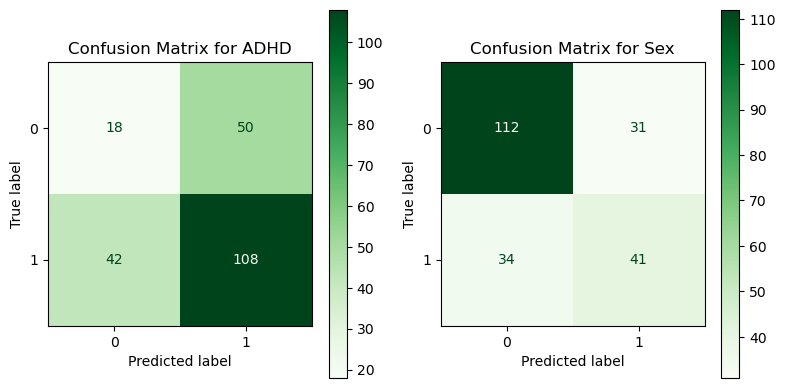

In [13]:
classification_report_adhd_sex(y_test, y_pred)

HIPERPARAMETERS:

In [14]:
model = MultiOutputClassifier(LogisticRegression(class_weight="balanced"))

In [15]:
param_dist = {
    'estimator__C': [0.001, 0.01, 0.1, 1, 10],
    'estimator__solver': ['liblinear', 'lbfgs', 'saga'],
    'estimator__penalty': ['l2', 'l1'],
    'estimator__max_iter': [500, 1000, 5000, 10000]
}

In [16]:
grid_search = GridSearchCV(model, param_dist, cv=5, scoring='f1_macro', n_jobs=-1, verbose=0)

grid_search.fit(X_train, y_train)

print("Best hyperparameters found:", grid_search.best_params_)

best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)
y_pred_prob = best_model.predict_proba(X_test)

/Users/alexa_baran/miniconda3/envs/venv_datathon25/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/alexa_baran/miniconda3/envs/venv_datathon25/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/alexa_baran/miniconda3/envs/venv_datathon25/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/alexa_baran/miniconda3/envs/venv_datathon25/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/alexa_baran/miniconda3/envs/venv_datathon25/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The ma

Best hyperparameters found: {'estimator__C': 0.01, 'estimator__max_iter': 500, 'estimator__penalty': 'l2', 'estimator__solver': 'saga'}


Classification Report (Test Set):

--- ADHD ---
              precision    recall  f1-score   support

           0       0.35      0.32      0.34        68
           1       0.70      0.73      0.71       150

    accuracy                           0.60       218
   macro avg       0.53      0.53      0.53       218
weighted avg       0.59      0.60      0.60       218

Weighted F1 Score for ADHD: 0.6323

--- Sex ---
              precision    recall  f1-score   support

           0       0.77      0.77      0.77       143
           1       0.57      0.57      0.57        75

    accuracy                           0.70       218
   macro avg       0.67      0.67      0.67       218
weighted avg       0.70      0.70      0.70       218

Weighted F1 Score for Sex: 0.7023

Average Weighted F1 Score (Final Score): 0.6673

Multi-label Confusion Matrix (Test Set):
[[[ 22  46]
  [ 41 109]]

 [[110  33]
  [ 32  43]]]


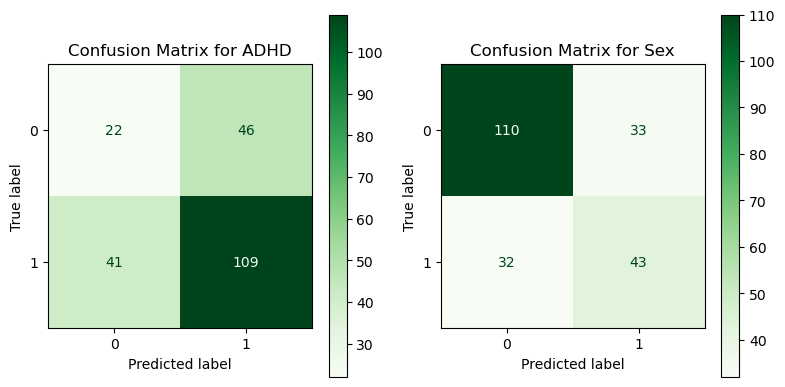

In [17]:
classification_report_adhd_sex(y_test, y_pred)

Two seperate models:

In [18]:
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10],
    'solver': ['liblinear', 'lbfgs', 'saga'],
    'penalty': ['l1', 'l2'],
    'max_iter': [500, 1000, 5000, 10000]
}

# ADHD Model
grid_adhd = GridSearchCV(
    LogisticRegression(class_weight='balanced'),
    param_grid,
    scoring='f1_macro',
    cv=5,
    n_jobs=-1,
    verbose=1
)
grid_adhd.fit(X_train, y_train["ADHD_Outcome"])
print("Best ADHD model params:", grid_adhd.best_params_)

# Sex Model
grid_sex = GridSearchCV(
    LogisticRegression(class_weight='balanced'),
    param_grid,
    scoring='f1_macro',
    cv=5,
    n_jobs=-1,
    verbose=1
)
grid_sex.fit(X_train, y_train["Sex_F"])
print("Best Sex model params:", grid_sex.best_params_)

adhd_preds_test = grid_adhd.predict(X_test)
sex_preds_test = grid_sex.predict(X_test)


Fitting 5 folds for each of 120 candidates, totalling 600 fits


/Users/alexa_baran/miniconda3/envs/venv_datathon25/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/alexa_baran/miniconda3/envs/venv_datathon25/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/alexa_baran/miniconda3/envs/venv_datathon25/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/alexa_baran/miniconda3/envs/venv_datathon25/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/alexa_baran/miniconda3/envs/venv_datathon25/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The ma

Best ADHD model params: {'C': 0.01, 'max_iter': 500, 'penalty': 'l2', 'solver': 'lbfgs'}
Fitting 5 folds for each of 120 candidates, totalling 600 fits


/Users/alexa_baran/miniconda3/envs/venv_datathon25/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/alexa_baran/miniconda3/envs/venv_datathon25/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/alexa_baran/miniconda3/envs/venv_datathon25/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/alexa_baran/miniconda3/envs/venv_datathon25/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/alexa_baran/miniconda3/envs/venv_datathon25/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The ma

Best Sex model params: {'C': 0.01, 'max_iter': 500, 'penalty': 'l2', 'solver': 'liblinear'}


/Users/alexa_baran/miniconda3/envs/venv_datathon25/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:540: FitFailedWarning: 
100 fits failed out of a total of 600.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
100 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/alexa_baran/miniconda3/envs/venv_datathon25/lib/python3.11/site-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/alexa_baran/miniconda3/envs/venv_datathon25/lib/python3.11/site-packages/sklearn/base.py", line 1473, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  Fil

In [19]:
print("\n--- ADHD Classification Report ---")
print(classification_report(y_test["ADHD_Outcome"], adhd_preds_test))
print("Confusion Matrix (ADHD):")
print(confusion_matrix(y_test["ADHD_Outcome"], adhd_preds_test))

print("\n--- Sex Classification Report ---")
print(classification_report(y_test["Sex_F"], sex_preds_test))
print("Confusion Matrix (Sex):")
print(confusion_matrix(y_test["Sex_F"], sex_preds_test))


--- ADHD Classification Report ---
              precision    recall  f1-score   support

           0       0.35      0.32      0.34        68
           1       0.70      0.73      0.71       150

    accuracy                           0.60       218
   macro avg       0.53      0.53      0.53       218
weighted avg       0.59      0.60      0.60       218

Confusion Matrix (ADHD):
[[ 22  46]
 [ 41 109]]

--- Sex Classification Report ---
              precision    recall  f1-score   support

           0       0.79      0.70      0.74       143
           1       0.53      0.65      0.59        75

    accuracy                           0.68       218
   macro avg       0.66      0.68      0.67       218
weighted avg       0.70      0.68      0.69       218

Confusion Matrix (Sex):
[[100  43]
 [ 26  49]]


# 2. Random Forest

In [20]:
base_clf = RandomForestClassifier(
    n_estimators=200,
    max_depth=5,
    min_samples_split=10,
    min_samples_leaf=5,
    max_features='sqrt',
    class_weight='balanced',
    random_state=42,
    n_jobs=-1
)

In [21]:
# MultiOutputClassifier - Random Forest for all data
multi_clf = MultiOutputClassifier(base_clf)

multi_clf.fit(X_train, y_train)

y_pred = multi_clf.predict(X_test)

Classification Report (Test Set):

--- ADHD ---
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        68
           1       0.68      0.97      0.80       150

    accuracy                           0.67       218
   macro avg       0.34      0.49      0.40       218
weighted avg       0.47      0.67      0.55       218

Weighted F1 Score for ADHD: 0.6220

--- Sex ---
              precision    recall  f1-score   support

           0       0.65      0.98      0.78       143
           1       0.25      0.01      0.03        75

    accuracy                           0.65       218
   macro avg       0.45      0.50      0.40       218
weighted avg       0.52      0.65      0.52       218

Weighted F1 Score for Sex: 0.5232

Average Weighted F1 Score (Final Score): 0.5726

Multi-label Confusion Matrix (Test Set):
[[[  0  68]
  [  4 146]]

 [[140   3]
  [ 74   1]]]


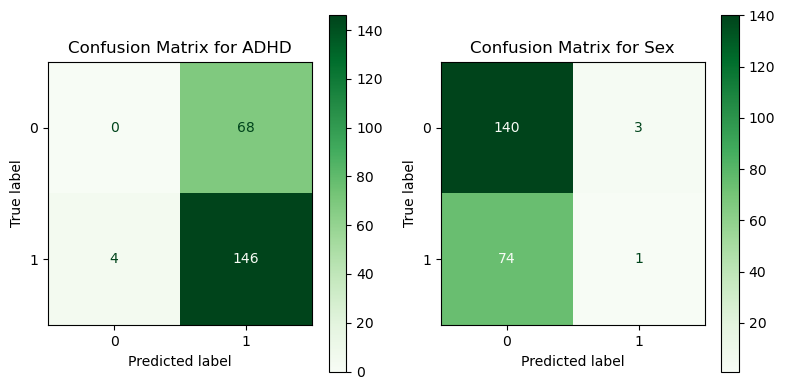

In [22]:
classification_report_adhd_sex(y_test, y_pred)

HYPERPARAMETERS

In [23]:
best_clf = RandomForestClassifier(
    random_state=42,
    n_jobs=-1,
    verbose=0
)

param_grid_rf = {
    'max_depth': [5, 10, 20, 50],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [2, 5, 10],
    'max_features': ['sqrt', 'log2'],
    'class_weight': ['balanced', {0: 1, 1: 2}],
    'n_estimators': [200, 500, 1000],
    'bootstrap': [False],
    'criterion': ['gini']
    }

In [24]:
grid_search_rf = GridSearchCV(
    estimator=best_clf, 
    param_grid=param_grid_rf,
    scoring='f1_macro',
    cv=5,
    n_jobs=-1,
    verbose=0
)

grid_search_rf.fit(X_train, y_train)

print("Best parameters found: ", grid_search_rf.best_params_)

/Users/alexa_baran/miniconda3/envs/venv_datathon25/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:540: FitFailedWarning: 
1080 fits failed out of a total of 2160.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
1080 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/alexa_baran/miniconda3/envs/venv_datathon25/lib/python3.11/site-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/alexa_baran/miniconda3/envs/venv_datathon25/lib/python3.11/site-packages/sklearn/base.py", line 1473, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  

Best parameters found:  {'bootstrap': False, 'class_weight': 'balanced', 'criterion': 'gini', 'max_depth': 5, 'max_features': 'sqrt', 'min_samples_leaf': 10, 'min_samples_split': 2, 'n_estimators': 500}


In [25]:
y_pred = grid_search_rf.predict(X_test)
y_pred_prob = grid_search_rf.predict_proba(X_test)

Classification Report (Test Set):

--- ADHD ---
              precision    recall  f1-score   support

           0       0.37      0.37      0.37        68
           1       0.71      0.71      0.71       150

    accuracy                           0.61       218
   macro avg       0.54      0.54      0.54       218
weighted avg       0.61      0.61      0.61       218

Weighted F1 Score for ADHD: 0.6335

--- Sex ---
              precision    recall  f1-score   support

           0       0.70      0.64      0.67       143
           1       0.41      0.48      0.44        75

    accuracy                           0.58       218
   macro avg       0.55      0.56      0.55       218
weighted avg       0.60      0.58      0.59       218

Weighted F1 Score for Sex: 0.5893

Average Weighted F1 Score (Final Score): 0.6114

Multi-label Confusion Matrix (Test Set):
[[[ 25  43]
  [ 43 107]]

 [[ 91  52]
  [ 39  36]]]


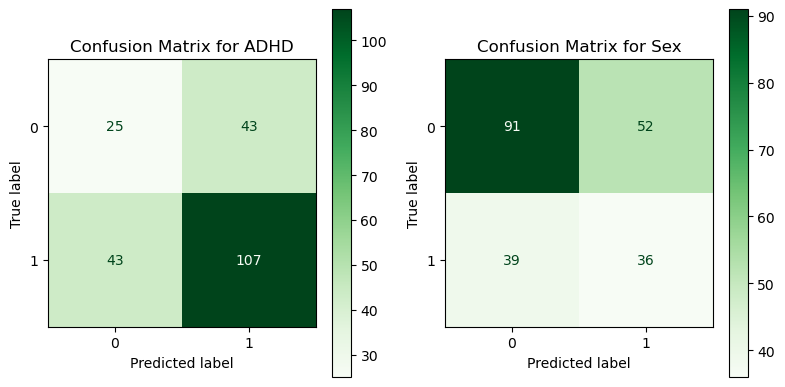

In [26]:
classification_report_adhd_sex(y_test, y_pred)

# 3. XGBoost

### XGBOOST 1 model

In [27]:
multi_xgb = MultiOutputClassifier(xgb.XGBClassifier(
    objective = "binary:logistic",
    n_estimators = 500,
    learning_rate = 0.01,
    tree_method = "hist",
    n_jobs = -1,
    random_state = 42
))


In [28]:
multi_xgb.fit(X_train, y_train)

y_pred_xgb = multi_xgb.predict(X_test)

Classification Report (Test Set):

--- ADHD ---
              precision    recall  f1-score   support

           0       0.33      0.01      0.03        68
           1       0.69      0.99      0.81       150

    accuracy                           0.68       218
   macro avg       0.51      0.50      0.42       218
weighted avg       0.58      0.68      0.57       218

Weighted F1 Score for ADHD: 0.6363

--- Sex ---
              precision    recall  f1-score   support

           0       0.66      0.97      0.79       143
           1       0.50      0.07      0.12        75

    accuracy                           0.66       218
   macro avg       0.58      0.52      0.45       218
weighted avg       0.61      0.66      0.56       218

Weighted F1 Score for Sex: 0.5563

Average Weighted F1 Score (Final Score): 0.5963

Multi-label Confusion Matrix (Test Set):
[[[  1  67]
  [  2 148]]

 [[138   5]
  [ 70   5]]]


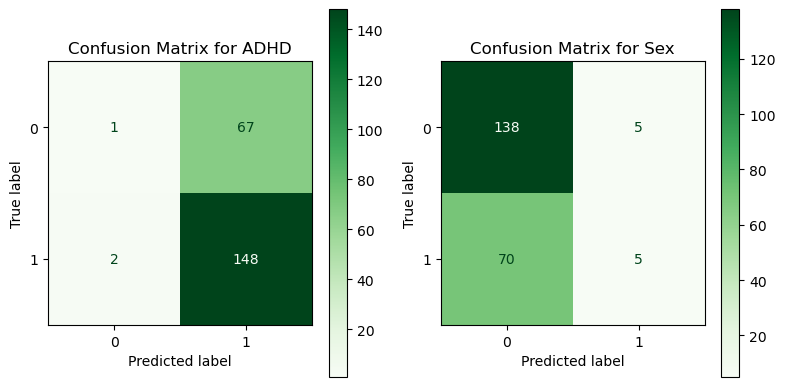

In [29]:
classification_report_adhd_sex(y_test, y_pred_xgb)

In [30]:
params_xgb_initial = {
    'objective': 'binary:logistic',
    'eval_metric': 'mlogloss',
    'booster': 'gbtree',
    'n_estimators': 200,
    'learning_rate': 0.01,
    'max_depth': 5,
    'min_child_weight': 2,
    'subsample': 0.8,
    'colsample_bytree': 0.8,
    'gamma': 0.2,
    'reg_alpha': 0.1,
    'reg_lambda': 1.5,
    'scale_pos_weight': 2,
    'tree_method': 'hist',
    'n_jobs': -1,
    'random_state': 42
}

In [31]:
multi_clf_xgb_initial = MultiOutputClassifier(xgb.XGBClassifier(**params_xgb_initial))

In [32]:
multi_clf_xgb_initial.fit(X_train, y_train)

y_pred = multi_clf_xgb_initial.predict(X_test)

Classification Report (Test Set):

--- ADHD ---
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        68
           1       0.69      1.00      0.82       150

    accuracy                           0.69       218
   macro avg       0.34      0.50      0.41       218
weighted avg       0.47      0.69      0.56       218

Weighted F1 Score for ADHD: 0.6314

--- Sex ---
              precision    recall  f1-score   support

           0       0.70      0.90      0.79       143
           1       0.60      0.28      0.38        75

    accuracy                           0.69       218
   macro avg       0.65      0.59      0.59       218
weighted avg       0.67      0.69      0.65       218

Weighted F1 Score for Sex: 0.6505

Average Weighted F1 Score (Final Score): 0.6409

Multi-label Confusion Matrix (Test Set):
[[[  0  68]
  [  0 150]]

 [[129  14]
  [ 54  21]]]


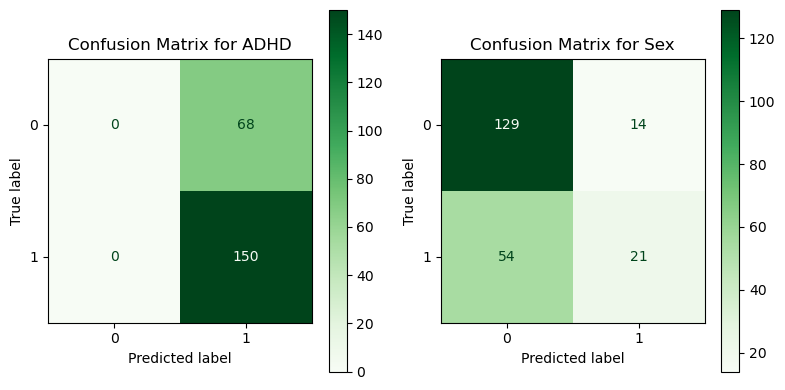

In [33]:
classification_report_adhd_sex(y_test, y_pred)

HYPERPARAMETR

In [34]:
param_dist = {
    'estimator__n_estimators': [200, 300, 400],
    'estimator__learning_rate': [0.001, 0.01, 0.05],
    'estimator__max_depth': [4, 5, 6],
    'estimator__min_child_weight': [1, 2],
    'estimator__subsample': [0.6, 0.8, 0.1],
    'estimator__colsample_bytree': [0.6, 0.8],
    'estimator__gamma': [0.1, 0.2],
    'estimator__reg_alpha': [0.01, 0.1, 1],
    'estimator__reg_lambda': [1, 1.5, 2],
    'estimator__scale_pos_weight': [1]
}

xgb_model = MultiOutputClassifier(xgb.XGBClassifier(
    objective='binary:logistic',
    eval_metric='mlogloss',
    booster='gbtree',
    tree_method='hist',
    n_jobs=-1,
    random_state=42
))


In [35]:
grid_search = RandomizedSearchCV(
    xgb_model,
    param_dist,
    scoring='f1_weighted',
    n_iter=100,
    cv=3,
    verbose=1,
    n_jobs=-1,
    random_state=42,
    error_score='raise'
)

grid_search.fit(X_train, y_train)

print("Best Parameters:", grid_search.best_params_)

best_xgb_model = grid_search.best_estimator_
y_pred = best_xgb_model.predict(X_test)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


/Users/alexa_baran/miniconda3/envs/venv_datathon25/lib/python3.11/site-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


Best Parameters: {'estimator__subsample': 0.6, 'estimator__scale_pos_weight': 1, 'estimator__reg_lambda': 2, 'estimator__reg_alpha': 0.1, 'estimator__n_estimators': 300, 'estimator__min_child_weight': 2, 'estimator__max_depth': 4, 'estimator__learning_rate': 0.05, 'estimator__gamma': 0.1, 'estimator__colsample_bytree': 0.8}


Classification Report (Test Set):

--- ADHD ---
              precision    recall  f1-score   support

           0       0.33      0.03      0.05        68
           1       0.69      0.97      0.81       150

    accuracy                           0.68       218
   macro avg       0.51      0.50      0.43       218
weighted avg       0.58      0.68      0.57       218

Weighted F1 Score for ADHD: 0.6364

--- Sex ---
              precision    recall  f1-score   support

           0       0.66      0.95      0.78       143
           1       0.46      0.08      0.14        75

    accuracy                           0.65       218
   macro avg       0.56      0.52      0.46       218
weighted avg       0.59      0.65      0.56       218

Weighted F1 Score for Sex: 0.5596

Average Weighted F1 Score (Final Score): 0.5980

Multi-label Confusion Matrix (Test Set):
[[[  2  66]
  [  4 146]]

 [[136   7]
  [ 69   6]]]


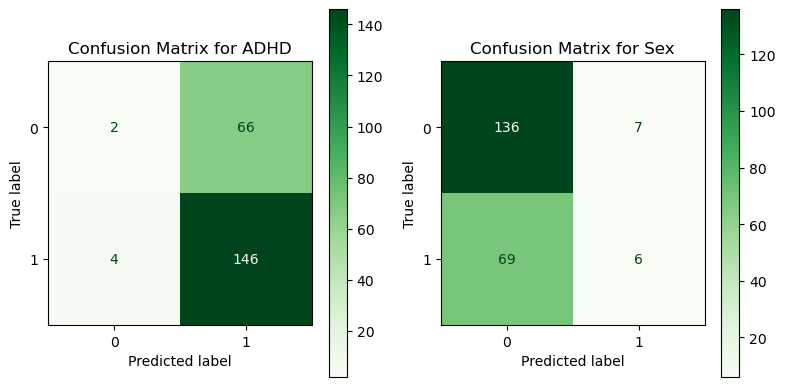

In [36]:
y_pred_prob = best_xgb_model.predict_proba(X_test)

classification_report_adhd_sex(y_test, y_pred)

### XGB - 2 seperate models - connected

In [37]:
# Handle targets separately for better performance
model_adhd = XGBClassifier(tree_method='hist', enable_categorical=True)
model_sex = XGBClassifier(tree_method='hist', enable_categorical=True)

param_dist = {
    'learning_rate': stats.loguniform(1e-3, 0.3),
    'max_depth': [3, 5, 7],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0],
    'n_estimators': [100, 200],
    'scale_pos_weight': [1, (224/101), (111/214)]
}

# Scoring for each target
search_adhd = RandomizedSearchCV(model_adhd, param_dist, n_iter=50,
                                scoring='f1_weighted', cv=5, n_jobs=-1)
search_sex = RandomizedSearchCV(model_sex, param_dist, n_iter=50,
                               scoring='f1_weighted', cv=5, n_jobs=-1)

search_adhd.fit(X_train, y_train_adhd)
search_sex.fit(X_train, y_train_sex)

adhd_pred = search_adhd.best_estimator_.predict(X_test)
sex_pred = search_sex.best_estimator_.predict(X_test)


/Users/alexa_baran/miniconda3/envs/venv_datathon25/lib/python3.11/site-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


In [38]:
# Optimal scale_pos_weight
adhd_ratio = len(y_train_adhd[y_train_adhd==0])/len(y_train_adhd[y_train_adhd==1])
sex_ratio = len(y_train_sex[y_train_sex==0])/len(y_train_sex[y_train_sex==1])

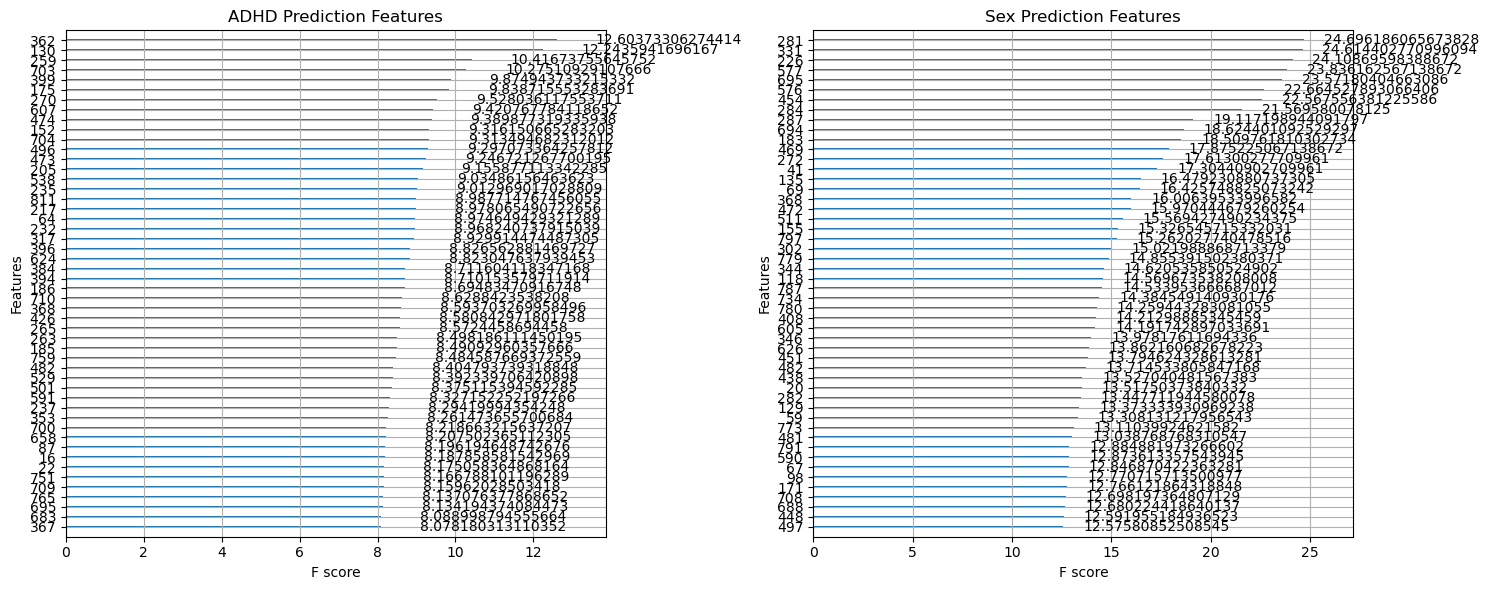

In [39]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# ADHD importance
plot_importance(search_adhd.best_estimator_, ax=ax1, importance_type='gain', max_num_features=50)
ax1.set_title('ADHD Prediction Features')

# Gender importance
plot_importance(search_sex.best_estimator_, ax=ax2, importance_type='gain', max_num_features=50)
ax2.set_title('Sex Prediction Features')

plt.tight_layout()
plt.show()

In [40]:
# feature importances
adhd_importances = search_adhd.best_estimator_.feature_importances_
sex_importances = search_sex.best_estimator_.feature_importances_

# sorted indices
adhd_indices = np.argsort(adhd_importances)[::-1]
sex_indices = np.argsort(sex_importances)[::-1]

# select top N features
top_n = 50
adhd_top_indices = adhd_indices[:top_n]
sex_top_indices = sex_indices[:top_n]

# Extract selected features - USING PROPER DATAFRAME INDEXING
X_adhd_selected = X_train.iloc[:, adhd_top_indices]
X_sex_selected = X_train.iloc[:, sex_top_indices]

# For testing data too
X_test_adhd = X_test.iloc[:, adhd_top_indices]
X_test_sex = X_test.iloc[:, sex_top_indices]

# Print most important features
print("Top 10 features for ADHD prediction:")
for i in range(10):
    print(f"Feature {adhd_top_indices[i]}: {adhd_importances[adhd_top_indices[i]]:.4f}")

print("\nTop 10 features for Sex prediction:")
for i in range(10):
    print(f"Feature {sex_top_indices[i]}: {sex_importances[sex_top_indices[i]]:.4f}")

Top 10 features for ADHD prediction:
Feature 362: 0.0032
Feature 130: 0.0032
Feature 259: 0.0027
Feature 703: 0.0026
Feature 399: 0.0025
Feature 175: 0.0025
Feature 270: 0.0025
Feature 607: 0.0024
Feature 474: 0.0024
Feature 152: 0.0024

Top 10 features for Sex prediction:
Feature 281: 0.0063
Feature 331: 0.0063
Feature 226: 0.0062
Feature 577: 0.0061
Feature 695: 0.0061
Feature 576: 0.0058
Feature 454: 0.0058
Feature 284: 0.0055
Feature 287: 0.0049
Feature 694: 0.0048


In [41]:
# Train ADHD model with selected features
adhd_model = XGBClassifier(
    learning_rate=0.1,
    max_depth=5,
    subsample=0.8,
    colsample_bytree=0.8,
    n_estimators=200,
    scale_pos_weight=224/101,  # Adjusted for class imbalance in ADHD
    tree_method='hist'
)
adhd_model.fit(X_adhd_selected, y_train_adhd)

# Train Sex model with selected features
sex_model = XGBClassifier(
    learning_rate=0.1,
    max_depth=5,
    subsample=0.8,
    colsample_bytree=0.8,
    n_estimators=200,
    scale_pos_weight=214/111,  # Adjusted for class imbalance in Sex
    tree_method='hist'
)
sex_model.fit(X_sex_selected, y_train_sex)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.8, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=200, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [42]:
class CombinedPredictor:
    def __init__(self, adhd_model, sex_model, adhd_indices, sex_indices):
        self.adhd_model = adhd_model
        self.sex_model = sex_model
        self.adhd_indices = adhd_indices
        self.sex_indices = sex_indices
    
    def predict(self, X):
        """Make predictions for both ADHD and Sex"""
        # Extract appropriate features for each model
        X_adhd = X.iloc[:, self.adhd_indices] if hasattr(X, 'iloc') else X[:, self.adhd_indices]
        X_sex = X.iloc[:, self.sex_indices] if hasattr(X, 'iloc') else X[:, self.sex_indices]
        
        # Get predictions
        adhd_pred = self.adhd_model.predict(X_adhd)
        sex_pred = self.sex_model.predict(X_sex)
        
        # Combine predictions
        return np.column_stack((adhd_pred, sex_pred))
    
    def predict_proba(self, X):
        """Get probability predictions for both ADHD and Sex"""
        # Extract appropriate features for each model
        X_adhd = X.iloc[:, self.adhd_indices] if hasattr(X, 'iloc') else X[:, self.adhd_indices]
        X_sex = X.iloc[:, self.sex_indices] if hasattr(X, 'iloc') else X[:, self.sex_indices]
        
        # Get probability predictions
        adhd_proba = self.adhd_model.predict_proba(X_adhd)
        sex_proba = self.sex_model.predict_proba(X_sex)
        
        return [adhd_proba, sex_proba]


In [43]:
# Combined model
combined_model = CombinedPredictor(
    adhd_model=adhd_model,
    sex_model=sex_model,
    adhd_indices=adhd_top_indices,
    sex_indices=sex_top_indices
)

y_pred_combined = combined_model.predict(X_test)

y_pred_adhd = y_pred_combined[:, 0]
y_pred_sex = y_pred_combined[:, 1]

print("\n--- ADHD Classification Report ---")
print(classification_report(y_test_adhd, y_pred_adhd))
adhd_f1 = f1_score(y_test_adhd, y_pred_adhd, average='weighted')
print(f"Weighted F1 Score for ADHD: {adhd_f1:.4f}")

print("\n--- Sex Classification Report ---")
print(classification_report(y_test_sex, y_pred_sex))
sex_f1 = f1_score(y_test_sex, y_pred_sex, average='weighted')
print(f"Weighted F1 Score for Sex: {sex_f1:.4f}")

# Overall score
print(f"\nAverage Weighted F1 Score: {(adhd_f1 + sex_f1)/2:.4f}")



--- ADHD Classification Report ---
              precision    recall  f1-score   support

           0       0.46      0.16      0.24        68
           1       0.71      0.91      0.80       150

    accuracy                           0.68       218
   macro avg       0.58      0.54      0.52       218
weighted avg       0.63      0.68      0.62       218

Weighted F1 Score for ADHD: 0.6226

--- Sex Classification Report ---
              precision    recall  f1-score   support

           0       0.70      0.82      0.75       143
           1       0.49      0.33      0.40        75

    accuracy                           0.65       218
   macro avg       0.60      0.58      0.58       218
weighted avg       0.63      0.65      0.63       218

Weighted F1 Score for Sex: 0.6317

Average Weighted F1 Score: 0.6272


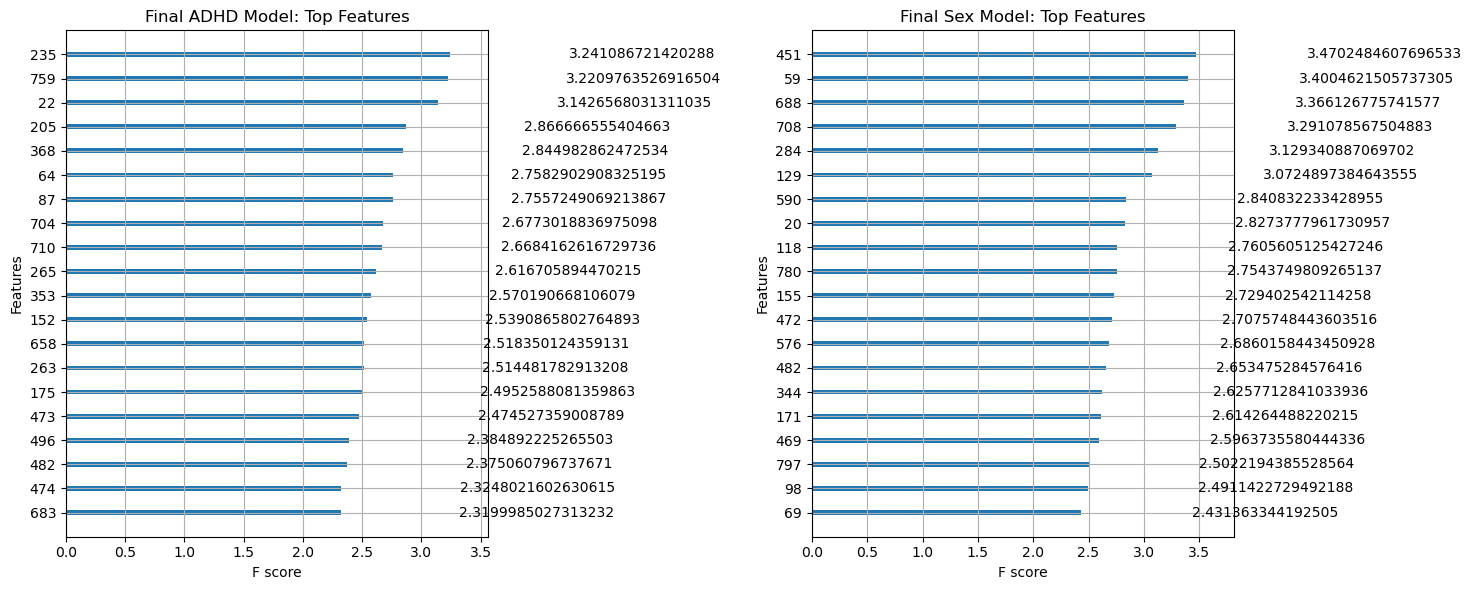

In [44]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

plot_importance(adhd_model, ax=ax1, importance_type='gain', max_num_features=20)
ax1.set_title('Final ADHD Model: Top Features')

plot_importance(sex_model, ax=ax2, importance_type='gain', max_num_features=20)
ax2.set_title('Final Sex Model: Top Features')

plt.tight_layout()
plt.savefig('final_feature_importance.png')
plt.show()


In [45]:
y_train_adhd = y_train_adhd.to_numpy()
y_test_adhd = y_test_adhd.to_numpy()
y_train_sex = y_train_sex.to_numpy()
y_test_sex = y_test_sex.to_numpy()

# Calculate scale_pos_weight for ADHD
num_negative_adhd_train = np.sum(y_train_adhd == 0)
num_positive_adhd_train = np.sum(y_train_adhd == 1)
scale_pos_weight_adhd = num_negative_adhd_train / num_positive_adhd_train if num_positive_adhd_train > 0 else 1

# Calculate scale_pos_weight for Sex
num_negative_sex_train = np.sum(y_train_sex == 0)
num_positive_sex_train = np.sum(y_train_sex == 1)
scale_pos_weight_sex = num_negative_sex_train / num_positive_sex_train if num_positive_sex_train > 0 else 1

In [46]:
# Model for ADHD
print("\n--- Training XGBoost Model for ADHD ---")
xgb_adhd = xgb.XGBClassifier(
    objective='binary:logistic',
    eval_metric='logloss',
    n_estimators=200,
    learning_rate=0.01,
    max_depth=3,
    min_child_weight=2,
    subsample=0.6,
    colsample_bytree=0.6,
    gamma=0.2,
    reg_alpha=0.1,
    reg_lambda=1.5,
    scale_pos_weight=scale_pos_weight_adhd,
    tree_method='hist',
    n_jobs=-1,
    random_state=42
)

xgb_adhd.fit(X_train, y_train_adhd)
y_pred_adhd = xgb_adhd.predict(X_test)

print("\nClassification Report (ADHD - Test Set):")
print(classification_report(y_test_adhd, y_pred_adhd, zero_division=0))
print("\nConfusion Matrix (ADHD - Test Set):")
print(confusion_matrix(y_test_adhd, y_pred_adhd))


--- Training XGBoost Model for ADHD ---

Classification Report (ADHD - Test Set):
              precision    recall  f1-score   support

           0       0.32      0.21      0.25        68
           1       0.69      0.80      0.74       150

    accuracy                           0.61       218
   macro avg       0.50      0.50      0.50       218
weighted avg       0.57      0.61      0.59       218


Confusion Matrix (ADHD - Test Set):
[[ 14  54]
 [ 30 120]]


In [47]:
# Model for Gender = Female
print("\n--- Training XGBoost Model for Sex ---")
xgb_sex = xgb.XGBClassifier(
    objective='binary:logistic',
    eval_metric='logloss',
    n_estimators=200,
    learning_rate=0.01,
    max_depth=3,
    min_child_weight=2,
    subsample=0.6,
    colsample_bytree=0.6,
    gamma=0.2,
    reg_alpha=0.1,
    reg_lambda=1.5,
    scale_pos_weight=scale_pos_weight_sex,
    tree_method='hist',
    n_jobs=-1,
    random_state=42
)

xgb_sex.fit(X_train, y_train_sex)
y_pred_sex = xgb_sex.predict(X_test)

print("\nClassification Report (Sex - Test Set):")
print(classification_report(y_test_sex, y_pred_sex, zero_division=0))
print("\nConfusion Matrix (Sex - Test Set):")
print(confusion_matrix(y_test_sex, y_pred_sex))


--- Training XGBoost Model for Sex ---

Classification Report (Sex - Test Set):
              precision    recall  f1-score   support

           0       0.69      0.78      0.73       143
           1       0.44      0.33      0.38        75

    accuracy                           0.62       218
   macro avg       0.56      0.55      0.55       218
weighted avg       0.60      0.62      0.61       218


Confusion Matrix (Sex - Test Set):
[[111  32]
 [ 50  25]]


In [48]:
# Saving ADHD model
joblib.dump(xgb_adhd, 'adhd_model_pca_no_outliers.pkl')
print("\nADHD model saved as adhd_model_pca_no_outliers.pkl")

# Saving Sex model
joblib.dump(xgb_sex, 'sex_model_pca_no_outliers.pkl')
print("\nSex model saved as sex_model_pca_no_outliers.pkl")


ADHD model saved as adhd_model_pca_no_outliers.pkl

Sex model saved as sex_model_pca_no_outliers.pkl


In [49]:
# Parallel Prediction Example
print("\n--- Parallel Prediction Example ---")

def predict_adhd_gender_parallel(brain_scan_data):
    """Predicts ADHD and Gender in parallel using loaded models."""
    loaded_adhd_model = joblib.load('adhd_model_pca_no_outliers.pkl')
    loaded_sex_model = joblib.load('sex_model_pca_no_outliers.pkl')

    adhd_prediction = loaded_adhd_model.predict(brain_scan_data)
    sex_prediction = loaded_sex_model.predict(brain_scan_data)
    return adhd_prediction, sex_prediction

# Example usage with the test data
parallel_adhd_preds, parallel_sex_preds = predict_adhd_gender_parallel(X_test)

print("\nFirst 10 Parallel Predictions (Test Data):")
for i in range(min(10, X_test.shape[0])):
    print(f"Patient {i+1}: Predicted ADHD = {parallel_adhd_preds[i]}, Predicted Sex = {parallel_sex_preds[i]}")


--- Parallel Prediction Example ---

First 10 Parallel Predictions (Test Data):
Patient 1: Predicted ADHD = 1, Predicted Sex = 1
Patient 2: Predicted ADHD = 0, Predicted Sex = 0
Patient 3: Predicted ADHD = 1, Predicted Sex = 0
Patient 4: Predicted ADHD = 0, Predicted Sex = 1
Patient 5: Predicted ADHD = 1, Predicted Sex = 0
Patient 6: Predicted ADHD = 1, Predicted Sex = 0
Patient 7: Predicted ADHD = 1, Predicted Sex = 1
Patient 8: Predicted ADHD = 0, Predicted Sex = 0
Patient 9: Predicted ADHD = 1, Predicted Sex = 1
Patient 10: Predicted ADHD = 1, Predicted Sex = 1



--- Evaluation ---

--- ADHD ---
              precision    recall  f1-score   support

           0       0.32      0.21      0.25        68
           1       0.69      0.80      0.74       150

    accuracy                           0.61       218
   macro avg       0.50      0.50      0.50       218
weighted avg       0.57      0.61      0.59       218


Confusion Matrix (ADHD):
[[ 14  54]
 [ 30 120]]

Accuracy (ADHD): 0.6147

--- Sex ---
              precision    recall  f1-score   support

           0       0.69      0.78      0.73       143
           1       0.44      0.33      0.38        75

    accuracy                           0.62       218
   macro avg       0.56      0.55      0.55       218
weighted avg       0.60      0.62      0.61       218


Confusion Matrix (Sex):
[[111  32]
 [ 50  25]]

Accuracy (Sex): 0.6239

Multi-label Confusion Matrix (Test Set):
[[[ 14  54]
  [ 30 120]]

 [[111  32]
  [ 50  25]]]


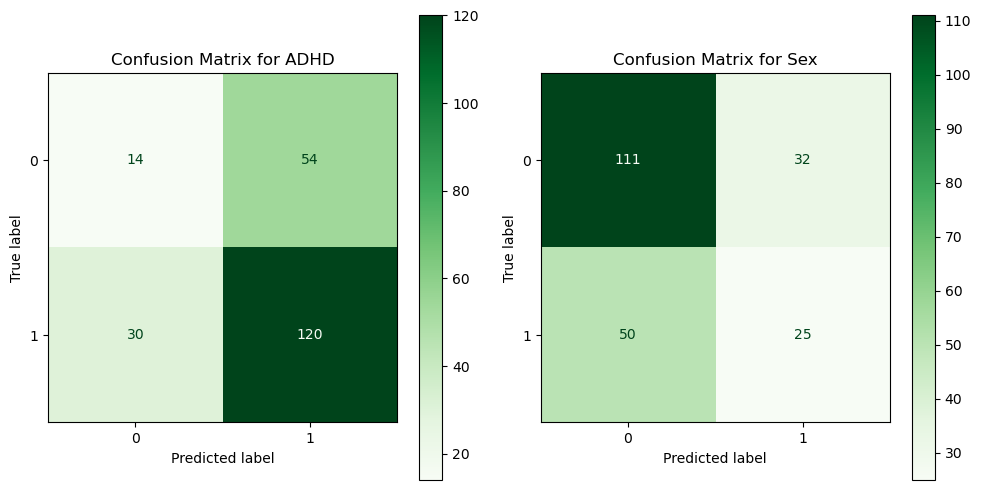


Models saved.


In [50]:
# Combine predictions for overall metrics
y_pred_combined = np.column_stack((y_pred_adhd, y_pred_sex))
y_test_combined = np.column_stack((y_test_adhd, y_test_sex))

print("\n--- Evaluation ---")

labels = ['ADHD', 'Sex']

for i, label in enumerate(labels):
    print(f"\n--- {label} ---")
    print(
        classification_report(
            y_test_combined[:, i], y_pred_combined[:, i], zero_division=0
        )
    )  # Corrected indexing
    print(f"\nConfusion Matrix ({label}):")
    cm = confusion_matrix(y_test_combined[:, i], y_pred_combined[:, i])
    print(cm)

    # Calculate and print accuracy
    accuracy = accuracy_score(y_test_combined[:, i], y_pred_combined[:, i])
    print(f"\nAccuracy ({label}): {accuracy:.4f}")


# Multi-label Confusion Matrix (Test Set):
print("\nMulti-label Confusion Matrix (Test Set):")
print(multilabel_confusion_matrix(y_test_combined, y_pred_combined))

# Create subplots for smaller plot sizes
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

# Confusion Matrix for ADHD
cm_adhd = confusion_matrix(y_test_combined[:, 0], y_pred_combined[:, 0])
disp_adhd = ConfusionMatrixDisplay(confusion_matrix=cm_adhd)
disp_adhd.plot(cmap='Greens', ax=axes[0])
axes[0].set_title('Confusion Matrix for ADHD')

# Confusion Matrix for Sex
cm_sex = confusion_matrix(y_test_combined[:, 1], y_pred_combined[:, 1])
disp_sex = ConfusionMatrixDisplay(confusion_matrix=cm_sex)
disp_sex.plot(cmap='Greens', ax=axes[1])
axes[1].set_title('Confusion Matrix for Sex')

plt.tight_layout()
plt.show()

# Save the models
joblib.dump(xgb_adhd, 'adhd_model_pca_no_outliers.pkl')
joblib.dump(xgb_sex, 'sex_model_pca_no_outliers.pkl')
print("\nModels saved.")

In [51]:
# ADHD MODEL

# Parameter distributions for RandomizedSearchCV (ADHD)
param_distributions_adhd = {
    'n_estimators': st.randint(50, 500),
    'learning_rate': st.loguniform(0.005, 0.3),
    'max_depth': st.randint(2, 10),
    'subsample': st.uniform(0.6, 0.4),
    'colsample_bytree': st.uniform(0.6, 0.4),
    'reg_alpha': st.uniform(0, 1.0),
    'reg_lambda': st.uniform(1, 5),
    'gamma': st.uniform(0, 0.5),
    'min_child_weight': st.randint(1, 10),
}

# XGBoost classifier for ADHD
xgb_adhd = xgb.XGBClassifier(
    objective='binary:logistic',
    eval_metric='logloss',
    tree_method='hist',
    scale_pos_weight=scale_pos_weight_adhd,
    n_jobs=-1,
    random_state=42,
)

cv_adhd = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

In [52]:
# RandomizedSearchCV for ADHD (optimizing F1)
n_iter_adhd = 500
random_search_adhd = RandomizedSearchCV(
    xgb_adhd,
    param_distributions=param_distributions_adhd,
    n_iter=n_iter_adhd,
    scoring='f1',
    cv=cv_adhd,
    refit=True,
    random_state=42,
    n_jobs=-1,
    error_score='raise',
)

random_search_adhd.fit(X_train, y_train_adhd)

print("Best parameters for ADHD (F1):", random_search_adhd.best_params_)
print("Best F1 score for ADHD:", random_search_adhd.best_score_)

/Users/alexa_baran/miniconda3/envs/venv_datathon25/lib/python3.11/site-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(
/Users/alexa_baran/miniconda3/envs/venv_datathon25/lib/python3.11/site-packages/numpy/ma/core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


Best parameters for ADHD (F1): {'colsample_bytree': 0.6301738188359077, 'gamma': 0.08310771595462646, 'learning_rate': 0.012147569383423894, 'max_depth': 8, 'min_child_weight': 1, 'n_estimators': 422, 'reg_alpha': 0.6969250558638148, 'reg_lambda': 2.9210091568960994, 'subsample': 0.8948402823372077}
Best F1 score for ADHD: 0.8043814985745781


In [53]:
# ADHD model with best parameters
best_xgb_adhd = xgb.XGBClassifier(
    **random_search_adhd.best_params_,
    objective='binary:logistic',
    eval_metric='logloss',
    tree_method='hist',
    n_jobs=-1,
    random_state=42,
)
best_xgb_adhd.fit(X_train, y_train_adhd)
y_pred_adhd = best_xgb_adhd.predict(X_test)

In [54]:
# SEX MODEL

# Parameter distributions for RandomizedSearchCV (Sex)
param_distributions_sex = {
    'n_estimators': st.randint(50, 500),
    'learning_rate': st.loguniform(0.005, 0.3),
    'max_depth': st.randint(2, 10),
    'subsample': st.uniform(0.6, 0.4),
    'colsample_bytree': st.uniform(0.6, 0.4),
    'reg_alpha': st.uniform(0, 1.0),
    'reg_lambda': st.uniform(1, 5),
    'gamma': st.uniform(0, 0.5),
    'min_child_weight': st.randint(1, 10),
}

# XGBoost classifier for Sex_F
xgb_sex = xgb.XGBClassifier(
    objective='binary:logistic',
    eval_metric='logloss',
    tree_method='hist',
    scale_pos_weight=scale_pos_weight_sex,
    n_jobs=-1,
    random_state=42,
)

# Cross-validation strategy
cv_sex = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

In [55]:
# RandomizedSearchCV for Sex (optimizing F1)
n_iter_sex = 500
random_search_sex = RandomizedSearchCV(
    xgb_sex,
    param_distributions=param_distributions_sex,
    n_iter=n_iter_sex,
    scoring='f1',
    cv=cv_sex,
    refit=True,
    random_state=42,
    n_jobs=-1,
    error_score='raise',
)

random_search_sex.fit(X_train, y_train_sex)

print("Best parameters for Sex (F1):", random_search_sex.best_params_)
print("Best F1 score for Sex:", random_search_sex.best_score_)

/Users/alexa_baran/miniconda3/envs/venv_datathon25/lib/python3.11/site-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


Best parameters for Sex (F1): {'colsample_bytree': 0.7336975563267844, 'gamma': 0.38545610187291096, 'learning_rate': 0.007736024231849135, 'max_depth': 2, 'min_child_weight': 8, 'n_estimators': 66, 'reg_alpha': 0.41279355060675227, 'reg_lambda': 4.5246277484447655, 'subsample': 0.8393144233072618}
Best F1 score for Sex: 0.4597935799803567


In [56]:
# Sex_F model with best parameters
best_xgb_sex = xgb.XGBClassifier(
    **random_search_sex.best_params_,
    objective='binary:logistic',
    eval_metric='logloss',
    tree_method='hist',
    n_jobs=-1,
    random_state=42,
)
best_xgb_sex.fit(X_train, y_train_sex)
y_pred_sex = best_xgb_sex.predict(X_test)


--- Evaluation ---

--- ADHD ---
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        68
           1       0.69      1.00      0.82       150

    accuracy                           0.69       218
   macro avg       0.34      0.50      0.41       218
weighted avg       0.47      0.69      0.56       218


Confusion Matrix (ADHD):
[[  0  68]
 [  0 150]]

Accuracy (ADHD): 0.6881

--- Sex ---
              precision    recall  f1-score   support

           0       0.66      1.00      0.79       143
           1       0.00      0.00      0.00        75

    accuracy                           0.66       218
   macro avg       0.33      0.50      0.40       218
weighted avg       0.43      0.66      0.52       218


Confusion Matrix (Sex):
[[143   0]
 [ 75   0]]

Accuracy (Sex): 0.6560

Multi-label Confusion Matrix (Test Set):
[[[  0  68]
  [  0 150]]

 [[143   0]
  [ 75   0]]]


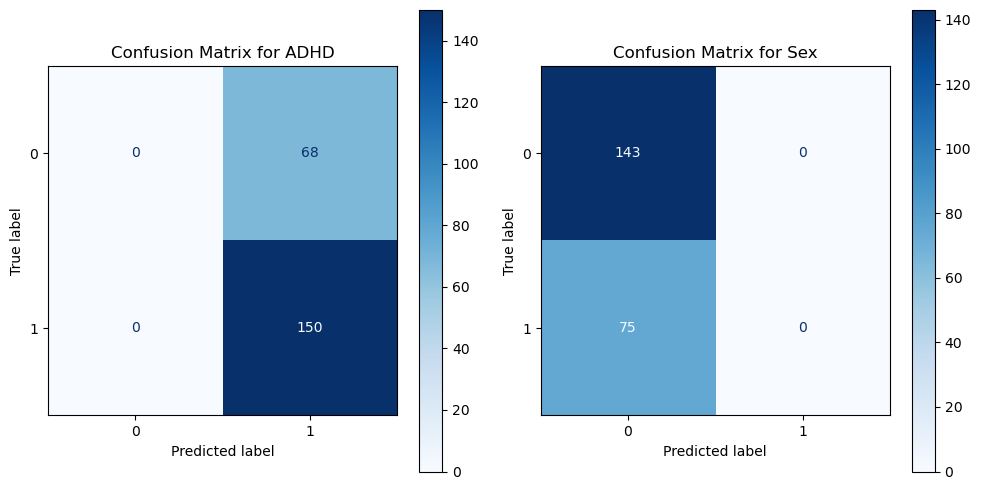

In [57]:
# Combine predictions for overall metrics
y_pred_combined = np.column_stack((y_pred_adhd, y_pred_sex))
y_test_combined = np.column_stack((y_test_adhd, y_test_sex))


print("\n--- Evaluation ---")

labels = ['ADHD', 'Sex']

for i, label in enumerate(labels):
    print(f"\n--- {label} ---")
    print(
        classification_report(
            y_test_combined[:, i], y_pred_combined[:, i], zero_division=0
        )
    )
    print(f"\nConfusion Matrix ({label}):")
    cm = confusion_matrix(y_test_combined[:, i], y_pred_combined[:, i])
    print(cm)

    accuracy = accuracy_score(y_test_combined[:, i], y_pred_combined[:, i])
    print(f"\nAccuracy ({label}): {accuracy:.4f}")


# Multi-label Confusion Matrix (Test Set):
print("\nMulti-label Confusion Matrix (Test Set):")
print(multilabel_confusion_matrix(y_test_combined, y_pred_combined))


fig, axes = plt.subplots(1, 2, figsize=(10, 5))

cm_adhd = confusion_matrix(y_test_combined[:, 0], y_pred_combined[:, 0])
disp_adhd = ConfusionMatrixDisplay(confusion_matrix=cm_adhd)
disp_adhd.plot(cmap='Blues', ax=axes[0])
axes[0].set_title('Confusion Matrix for ADHD')

cm_sex = confusion_matrix(y_test_combined[:, 1], y_pred_combined[:, 1])
disp_sex = ConfusionMatrixDisplay(confusion_matrix=cm_sex)
disp_sex.plot(cmap='Blues', ax=axes[1])
axes[1].set_title('Confusion Matrix for Sex')

plt.tight_layout()
plt.show()

In [58]:
# Save the models
joblib.dump(best_xgb_adhd, 'adhd_model_pca_no_outliers_tuned.pkl')
joblib.dump(best_xgb_sex, 'sex_model_pca_no_outliers_tuned.pkl')
print("\nTuned models saved.")


Tuned models saved.


# 4. SVM


In [62]:
print(y_train.columns)

Index(['ADHD_Outcome', 'Sex_F'], dtype='object')


In [63]:
svm = SVC(kernel='rbf', class_weight='balanced', probability=True)

# Wrap in MultiOutputClassifier
multi_clf = MultiOutputClassifier(svm)

multi_clf.fit(X_train, y_train)
y_pred = multi_clf.predict(X_test)

y_pred = pd.DataFrame(y_pred, columns=['ADHD_Outcome', 'Sex_F'])

def custom_weighted_f1(y_true, y_pred):
    if not isinstance(y_true, pd.DataFrame):
        y_true = pd.DataFrame(y_true, columns=['ADHD_Outcome', 'Sex_F'])
    if not isinstance(y_pred, pd.DataFrame):
        y_pred = pd.DataFrame(y_pred, columns=['ADHD_Outcome', 'Sex_F'])

    mask_af = (y_true['ADHD_Outcome'] == 1) & (y_true['Sex_F'] == 1)
    weights = np.where(mask_af, 2.0, 1.0)

    f1_adhd_weighted = precision_recall_fscore_support(
        y_true['ADHD_Outcome'], y_pred['ADHD_Outcome'],
        sample_weight=weights, average='binary'
    )[2]

    f1_sex = precision_recall_fscore_support(
        y_true['Sex_F'], y_pred['Sex_F'],
        average='binary'
    )[2]

    return (f1_adhd_weighted + f1_sex) / 2

score = custom_weighted_f1(y_test, y_pred)
print(f"Custom Weighted F1 Score: {score:.4f}")


Custom Weighted F1 Score: 0.6311


In [64]:
y_pred_proba = multi_clf.predict_proba(X_test)

y_pred_proba = np.array(y_pred_proba)

print(y_pred_proba.shape)

adhd_pred_proba = y_pred_proba[0, :, 1]
sex_pred_proba = y_pred_proba[1, :, 1]

(2, 218, 2)


In [65]:
y_pred_adjusted_adhd = (adhd_pred_proba >= 0.7).astype(int)
y_pred_adjusted_sex = (sex_pred_proba >= 0.3).astype(int)

print("Classification Report for ADHD_Outcome:")
print(classification_report(y_test['ADHD_Outcome'], y_pred_adjusted_adhd))
print("ADHD Confusion Matrix:")
print(confusion_matrix(y_test['ADHD_Outcome'], y_pred_adjusted_adhd))

print("\nClassification Report for Sex_F:")
print(classification_report(y_test['Sex_F'], y_pred_adjusted_sex))
print("Gender Confusion Matrix:")
print(confusion_matrix(y_test['ADHD_Outcome'], y_pred_adjusted_sex))

Classification Report for ADHD_Outcome:
              precision    recall  f1-score   support

           0       0.36      0.59      0.45        68
           1       0.74      0.53      0.62       150

    accuracy                           0.55       218
   macro avg       0.55      0.56      0.53       218
weighted avg       0.62      0.55      0.57       218

ADHD Confusion Matrix:
[[40 28]
 [70 80]]

Classification Report for Sex_F:
              precision    recall  f1-score   support

           0       0.81      0.62      0.70       143
           1       0.50      0.73      0.59        75

    accuracy                           0.66       218
   macro avg       0.66      0.67      0.65       218
weighted avg       0.71      0.66      0.66       218

Gender Confusion Matrix:
[[33 35]
 [75 75]]


In [66]:
y_test_df = pd.DataFrame(y_test, columns=['ADHD_Outcome', 'Sex_F'])
y_pred_df = pd.DataFrame(y_pred, columns=['ADHD_Outcome', 'Sex_F'])

print("ADHD Diagnosis Report:")
print(classification_report(y_test_df['ADHD_Outcome'], y_pred_df['ADHD_Outcome'], digits=4))

print("ADHD Confusion Matrix:")
print(confusion_matrix(y_test_df['ADHD_Outcome'], y_pred_df['ADHD_Outcome']))

print("\nSex Classification Report:")
print(classification_report(y_test_df['Sex_F'], y_pred_df['Sex_F'], digits=4))

print("Sex Confusion Matrix:")
print(confusion_matrix(y_test_df['Sex_F'], y_pred_df['Sex_F']))

score = custom_weighted_f1(y_test_df, y_pred_df)
print(f"\nCustom Weighted F1 Score (Competition Metric): {score:.4f}")

ADHD Diagnosis Report:
              precision    recall  f1-score   support

           0     0.3864    0.2500    0.3036        68
           1     0.7069    0.8200    0.7593       150

    accuracy                         0.6422       218
   macro avg     0.5466    0.5350    0.5314       218
weighted avg     0.6069    0.6422    0.6171       218

ADHD Confusion Matrix:
[[ 17  51]
 [ 27 123]]

Sex Classification Report:
              precision    recall  f1-score   support

           0     0.7301    0.8322    0.7778       143
           1     0.5636    0.4133    0.4769        75

    accuracy                         0.6881       218
   macro avg     0.6468    0.6228    0.6274       218
weighted avg     0.6728    0.6881    0.6743       218

Sex Confusion Matrix:
[[119  24]
 [ 44  31]]

Custom Weighted F1 Score (Competition Metric): 0.6311


In [67]:
svm_adhd = SVC(kernel='rbf', class_weight='balanced', probability=True)

weights = np.ones(len(y_train))
adhd_female_mask = (y_train['ADHD_Outcome'] == 1) & (y_train['Sex_F'] == 1)
weights[adhd_female_mask] = 2.0

svm_adhd.fit(X_train, y_train['ADHD_Outcome'], sample_weight=weights)

svm_sex = SVC(kernel='rbf', class_weight='balanced', probability=True)
svm_sex.fit(X_train, y_train['Sex_F'])

adhd_pred = svm_adhd.predict(X_test)
sex_pred = svm_sex.predict(X_test)

y_pred = pd.DataFrame({
    'ADHD_Outcome': adhd_pred,
    'Sex_F': sex_pred
})

def custom_weighted_f1(y_true, y_pred):
    if not isinstance(y_true, pd.DataFrame):
        y_true = pd.DataFrame(y_true, columns=['ADHD_Outcome', 'Sex_F'])
    if not isinstance(y_pred, pd.DataFrame):
        y_pred = pd.DataFrame(y_pred, columns=['ADHD_Outcome', 'Sex_F'])

    mask_af = (y_true['ADHD_Outcome'] == 1) & (y_true['Sex_F'] == 1)
    weights = np.where(mask_af, 2.0, 1.0)

    f1_adhd_weighted = precision_recall_fscore_support(
        y_true['ADHD_Outcome'], y_pred['ADHD_Outcome'],
        sample_weight=weights, average='binary'
    )[2]

    f1_sex = precision_recall_fscore_support(
        y_true['Sex_F'], y_pred['Sex_F'],
        average='binary'
    )[2]

    return (f1_adhd_weighted + f1_sex) / 2

score = custom_weighted_f1(y_test, y_pred)
print(f"Custom Weighted F1 Score: {score:.4f}")

Custom Weighted F1 Score: 0.6516


In [68]:
y_test_df = pd.DataFrame(y_test, columns=['ADHD_Outcome', 'Sex_F'])
y_pred_df = pd.DataFrame(y_pred, columns=['ADHD_Outcome', 'Sex_F'])

print("ADHD Diagnosis Report:")
print(classification_report(y_test_df['ADHD_Outcome'], y_pred_df['ADHD_Outcome'], digits=4))

print("ADHD Confusion Matrix:")
print(confusion_matrix(y_test_df['ADHD_Outcome'], y_pred_df['ADHD_Outcome']))

print("\nSex Classification Report:")
print(classification_report(y_test_df['Sex_F'], y_pred_df['Sex_F'], digits=4))

print("Sex Confusion Matrix:")
print(confusion_matrix(y_test_df['Sex_F'], y_pred_df['Sex_F']))

score = custom_weighted_f1(y_test_df, y_pred_df)
print(f"\nCustom Weighted F1 Score (Competition Metric): {score:.4f}")

ADHD Diagnosis Report:
              precision    recall  f1-score   support

           0     0.4815    0.1912    0.2737        68
           1     0.7120    0.9067    0.7977       150

    accuracy                         0.6835       218
   macro avg     0.5968    0.5489    0.5357       218
weighted avg     0.6401    0.6835    0.6342       218

ADHD Confusion Matrix:
[[ 13  55]
 [ 14 136]]

Sex Classification Report:
              precision    recall  f1-score   support

           0     0.7301    0.8322    0.7778       143
           1     0.5636    0.4133    0.4769        75

    accuracy                         0.6881       218
   macro avg     0.6468    0.6228    0.6274       218
weighted avg     0.6728    0.6881    0.6743       218

Sex Confusion Matrix:
[[119  24]
 [ 44  31]]

Custom Weighted F1 Score (Competition Metric): 0.6516


In [69]:
svm = SVC(probability=True)

multi_output_model = MultiOutputClassifier(svm)

param_grid = {
    'estimator__C': [0.1, 1, 10],
    'estimator__gamma': ['scale', 'auto'],
    'estimator__kernel': ['rbf', 'linear'],
    'estimator__class_weight': [None, 'balanced'],
}

grid_search = GridSearchCV(
    estimator=multi_output_model,
    param_grid=param_grid,
    cv=5,
    scoring='f1_weighted',
    verbose=1,
    n_jobs=-1
)

grid_search.fit(X_train, y_train)

print("Best parameters found: ", grid_search.best_params_)

best_model = grid_search.best_estimator_

y_pred_tuned = best_model.predict(X_test)

print("\nClassification Report for ADHD_Outcome:")
print(classification_report(y_test['ADHD_Outcome'], y_pred_tuned[:, 0]))

print("ADHD Confusion Matrix:")
print(confusion_matrix(y_test['ADHD_Outcome'], y_pred_tuned[:, 0]))

print("\nClassification Report for Sex_F:")
print(classification_report(y_test['Sex_F'], y_pred_tuned[:, 1]))

print("Sex Confusion Matrix:")
print(confusion_matrix(y_test['Sex_F'], y_pred_tuned[:, 1]))

score = custom_weighted_f1(y_test, y_pred_df)
print(f"\nCustom Weighted F1 Score (Competition Metric): {score:.4f}")


Fitting 5 folds for each of 24 candidates, totalling 120 fits
Best parameters found:  {'estimator__C': 1, 'estimator__class_weight': 'balanced', 'estimator__gamma': 'scale', 'estimator__kernel': 'rbf'}

Classification Report for ADHD_Outcome:
              precision    recall  f1-score   support

           0       0.39      0.25      0.30        68
           1       0.71      0.82      0.76       150

    accuracy                           0.64       218
   macro avg       0.55      0.53      0.53       218
weighted avg       0.61      0.64      0.62       218

ADHD Confusion Matrix:
[[ 17  51]
 [ 27 123]]

Classification Report for Sex_F:
              precision    recall  f1-score   support

           0       0.73      0.83      0.78       143
           1       0.56      0.41      0.48        75

    accuracy                           0.69       218
   macro avg       0.65      0.62      0.63       218
weighted avg       0.67      0.69      0.67       218

Sex Confusion Matrix:
[

# 5. Neural Network

1st Neural Network

In [70]:
# Data
y_train_adhd = to_categorical(y_train['ADHD_Outcome'], num_classes=2)
y_train_sex = to_categorical(y_train['Sex_F'], num_classes=2)
y_test_adhd = to_categorical(y_test['ADHD_Outcome'], num_classes=2)
y_test_sex = to_categorical(y_test['Sex_F'], num_classes=2)

input_layer = Input(shape=(X_train.shape[1],))

x = Dense(128, activation='relu')(input_layer)
x = Dense(64, activation='relu')(x)
x = Dense(32, activation='relu')(x)

adhd_output = Dense(2, activation='softmax', name='adhd_output')(x)

sex_output = Dense(2, activation='softmax', name='sex_output')(x)

model = Model(inputs=input_layer, outputs=[adhd_output, sex_output])

model.compile(
    optimizer=Adam(),
    loss={'adhd_output': 'categorical_crossentropy', 'sex_output': 'categorical_crossentropy'},
    metrics=['accuracy', 'accuracy']
)

history = model.fit(
    X_train, 
    {'adhd_output': y_train_adhd, 'sex_output': y_train_sex},
    epochs=50,
    batch_size=16,
    validation_data=(X_test, {'adhd_output': y_test_adhd, 'sex_output': y_test_sex})
)

results = model.evaluate(X_test, {'adhd_output': y_test_adhd, 'sex_output': y_test_sex}, verbose=0)

for name, value in zip(model.metrics_names, results):
    print(f"{name}: {value}")


y_pred = model.predict(X_test)

y_pred_adhd = y_pred[0]
y_pred = y_pred[1]

y_pred_adhd = y_pred_adhd.argmax(axis=1)
y_pred = y_pred.argmax(axis=1)


print("\nClassification Report for ADHD_Outcome:")
print(classification_report(y_test['ADHD_Outcome'], y_pred_adhd))

print("\nClassification Report for Sex_F:")
print(classification_report(y_test['Sex_F'], y_pred))

print("\nConfusion Matrix for ADHD_Outcome:")
print(confusion_matrix(y_test['ADHD_Outcome'], y_pred_adhd))

print("\nConfusion Matrix for Sex_F:")
print(confusion_matrix(y_test['Sex_F'], y_pred))

def weighted_f1(y_true, y_pred, sex_true):
    f1 = f1_score(y_true, y_pred, average=None)
    mask_female_adhd = (y_true == 1) & (sex_true == 1)
    weight = np.where(mask_female_adhd, 2, 1)
    f1_weighted = f1_score(y_true, y_pred, average='weighted', sample_weight=weight)
    return f1_weighted

final_weighted_f1 = weighted_f1(y_test['ADHD_Outcome'].values, y_pred_adhd, y_test['Sex_F'].values)
print(f"\nCustom Weighted F1 Score (female ADHD+ double): {final_weighted_f1:.4f}")

Epoch 1/50


2025-04-22 23:09:30.142278: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M4
2025-04-22 23:09:30.142534: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 16.00 GB
2025-04-22 23:09:30.142567: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 5.33 GB
2025-04-22 23:09:30.142589: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2025-04-22 23:09:30.142598: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)
2025-04-22 23:09:30.690324: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:117] Plugin optimizer for device_type GPU is enabled.


55/55 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/step - adhd_output_accuracy: 0.5312 - adhd_output_loss: 0.9818 - loss: 2.0863 - sex_output_accuracy: 0.5434 - sex_output_loss: 1.1044 - val_adhd_output_accuracy: 0.5183 - val_adhd_output_loss: 0.7790 - val_loss: 1.5451 - val_sex_output_accuracy: 0.6284 - val_sex_output_loss: 0.7628
Epoch 2/50
55/55 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - adhd_output_accuracy: 0.7519 - adhd_output_loss: 0.5079 - loss: 0.8990 - sex_output_accuracy: 0.8322 - sex_output_loss: 0.3911 - val_adhd_output_accuracy: 0.5780 - val_adhd_output_loss: 0.7539 - val_loss: 1.4882 - val_sex_output_accuracy: 0.6651 - val_sex_output_loss: 0.7321
Epoch 3/50
55/55 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - adhd_output_accuracy: 0.7830 - adhd_output_loss: 0.4515 - loss: 0.7448 - sex_output_accuracy: 0.8913 - sex_output_loss: 0.2933 - val_adhd_output_accuracy: 0.5550 - val_adhd_output_loss: 0.7905 - val_loss: 1.5670 - val_sex_output_accuracy: 0.6606 - val_sex_output_loss: 0.7758
Epoch 4/50
55/55 ━━━━━━━

In [71]:
preds = model.predict(X_test)
adhd_probs = preds[0].flatten()
sex_probs = preds[1].flatten()

adhd_preds_class = (adhd_probs >= 0.5).astype(int)
sex_preds_class = (sex_probs >= 0.5).astype(int)

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


In [72]:
adhd_probs

array([1.0000000e+00, 0.0000000e+00, 0.0000000e+00, 1.0000000e+00,
       0.0000000e+00, 1.0000000e+00, 0.0000000e+00, 1.0000000e+00,
       9.4499472e-07, 9.9999905e-01, 0.0000000e+00, 1.0000000e+00,
       0.0000000e+00, 1.0000000e+00, 1.0000000e+00, 1.5711087e-09,
       0.0000000e+00, 1.0000000e+00, 1.0000000e+00, 0.0000000e+00,
       1.0000000e+00, 0.0000000e+00, 1.0000000e+00, 0.0000000e+00,
       1.0000000e+00, 0.0000000e+00, 1.0000000e+00, 0.0000000e+00,
       1.0000000e+00, 0.0000000e+00, 1.0000000e+00, 0.0000000e+00,
       1.0000000e+00, 0.0000000e+00, 0.0000000e+00, 1.0000000e+00,
       0.0000000e+00, 1.0000000e+00, 0.0000000e+00, 1.0000000e+00,
       1.0000000e+00, 0.0000000e+00, 0.0000000e+00, 1.0000000e+00,
       1.0000000e+00, 0.0000000e+00, 1.0000000e+00, 0.0000000e+00,
       0.0000000e+00, 1.0000000e+00, 1.0000000e+00, 0.0000000e+00,
       1.0000000e+00, 0.0000000e+00, 0.0000000e+00, 1.0000000e+00,
       0.0000000e+00, 1.0000000e+00, 0.0000000e+00, 1.0000000e

In [73]:
true_adhd = y_test_adhd.flatten()
true_sex = y_test_sex.flatten()

# Custom weights: 2x if ADHD=1 and Sex=1
weights = 1 + ((true_adhd == 1) & (true_sex == 1)).astype(int)

# Weighted F1 for ADHD
f1_adhd = f1_score(true_adhd, adhd_preds_class, sample_weight=weights)

# F1 for sex
f1_sex = f1_score(true_sex, sex_preds_class)

# Final Kaggle-style average
final_score = (f1_adhd + f1_sex) / 2
print(f"Weighted F1 (ADHD): {f1_adhd:.4f}")
print(f"F1 (Sex): {f1_sex:.4f}")
print(f"Final Kaggle Score: {final_score:.4f}")


Weighted F1 (ADHD): 0.5979
F1 (Sex): 0.5826
Final Kaggle Score: 0.5902


Neural Network with dropouts and batch normalization

In [74]:
y_train_adhd = to_categorical(y_train['ADHD_Outcome'], num_classes=2)
y_train_sex = to_categorical(y_train['Sex_F'], num_classes=2)
y_test_adhd = to_categorical(y_test['ADHD_Outcome'], num_classes=2)
y_test_sex = to_categorical(y_test['Sex_F'], num_classes=2)

input_layer = Input(shape=(X_train.shape[1],))

x = Dense(128, activation='relu', kernel_regularizer=l2(0.0001))(input_layer)
x = BatchNormalization()(x)
x = Dropout(0.2)(x)

x = Dense(64, activation='relu', kernel_regularizer=l2(0.0001))(x)
x = BatchNormalization()(x)
x = Dropout(0.2)(x)

x = Dense(32, activation='relu')(x)
x = BatchNormalization()(x)

adhd_output = Dense(2, activation='softmax', name='adhd_output')(x)
sex_output = Dense(2, activation='softmax', name='sex_output')(x)

model = Model(inputs=input_layer, outputs=[adhd_output, sex_output])

model.compile(
    optimizer=Adam(learning_rate=1e-3),
    loss={'adhd_output': 'categorical_crossentropy', 'sex_output': 'categorical_crossentropy'},
    metrics=['accuracy', 'accuracy']
)

checkpoint = ModelCheckpoint(
    'best_model.h5',
    monitor='val_loss',
    save_best_only=True,
    verbose=1
)

callbacks = [
    EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True),
    ReduceLROnPlateau(monitor='val_loss', patience=3, factor=0.2, verbose=1),
    checkpoint
]

history = model.fit(
    X_train,
    {'adhd_output': y_train_adhd, 'sex_output': y_train_sex},
    validation_data=(X_test, {'adhd_output': y_test_adhd, 'sex_output': y_test_sex}),
    epochs=100,
    batch_size=16,
    callbacks=callbacks,
    verbose=1
)

results = model.evaluate(X_test, {'adhd_output': y_test_adhd, 'sex_output': y_test_sex}, verbose=0)
for name, val in zip(model.metrics_names, results):
    print(f"{name}: {val:.4f}")

y_pred_probs = model.predict(X_test)
y_pred_adhd = np.argmax(y_pred_probs[0], axis=1)
y_pred = np.argmax(y_pred_probs[1], axis=1)

print("\nClassification Report for ADHD_Outcome:")
print(classification_report(y_test['ADHD_Outcome'], y_pred_adhd))

print("\nClassification Report for Sex_F:")
print(classification_report(y_test['Sex_F'], y_pred))

print("\nConfusion Matrix for ADHD_Outcome:")
print(confusion_matrix(y_test['ADHD_Outcome'], y_pred_adhd))

print("\nConfusion Matrix for Sex_F:")
print(confusion_matrix(y_test['Sex_F'], y_pred))

def weighted_f1(y_true, y_pred, sex_true):
    f1 = f1_score(y_true, y_pred, average=None)
    mask_female_adhd = (y_true == 1) & (sex_true == 1)
    weight = np.where(mask_female_adhd, 2, 1)
    f1_weighted = f1_score(y_true, y_pred, average='weighted', sample_weight=weight)
    return f1_weighted

final_weighted_f1 = weighted_f1(y_test['ADHD_Outcome'].values, y_pred_adhd, y_test['Sex_F'].values)
print(f"\nCustom Weighted F1 Score (female ADHD+ double): {final_weighted_f1:.4f}")


Epoch 1/100
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - adhd_output_accuracy: 0.5043 - adhd_output_loss: 1.0824 - loss: 1.9984 - sex_output_accuracy: 0.5365 - sex_output_loss: 0.8852
Epoch 1: val_loss improved from inf to 1.54580, saving model to best_model.h5


55/55 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - adhd_output_accuracy: 0.5042 - adhd_output_loss: 1.0803 - loss: 1.9954 - sex_output_accuracy: 0.5368 - sex_output_loss: 0.8844 - val_adhd_output_accuracy: 0.5046 - val_adhd_output_loss: 0.7693 - val_loss: 1.5458 - val_sex_output_accuracy: 0.5872 - val_sex_output_loss: 0.7423 - learning_rate: 0.0010
Epoch 2/100
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - adhd_output_accuracy: 0.6633 - adhd_output_loss: 0.6008 - loss: 1.1966 - sex_output_accuracy: 0.7059 - sex_output_loss: 0.5646
Epoch 2: val_loss improved from 1.54580 to 1.42705, saving model to best_model.h5


55/55 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - adhd_output_accuracy: 0.6631 - adhd_output_loss: 0.6012 - loss: 1.1973 - sex_output_accuracy: 0.7058 - sex_output_loss: 0.5648 - val_adhd_output_accuracy: 0.5963 - val_adhd_output_loss: 0.7103 - val_loss: 1.4270 - val_sex_output_accuracy: 0.6239 - val_sex_output_loss: 0.6835 - learning_rate: 0.0010
Epoch 3/100
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - adhd_output_accuracy: 0.7118 - adhd_output_loss: 0.5659 - loss: 1.0770 - sex_output_accuracy: 0.7761 - sex_output_loss: 0.4795
Epoch 3: val_loss improved from 1.42705 to 1.40586, saving model to best_model.h5


55/55 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - adhd_output_accuracy: 0.7116 - adhd_output_loss: 0.5661 - loss: 1.0775 - sex_output_accuracy: 0.7757 - sex_output_loss: 0.4798 - val_adhd_output_accuracy: 0.6422 - val_adhd_output_loss: 0.6941 - val_loss: 1.4059 - val_sex_output_accuracy: 0.6193 - val_sex_output_loss: 0.6786 - learning_rate: 0.0010
Epoch 4/100
54/55 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - adhd_output_accuracy: 0.7705 - adhd_output_loss: 0.5055 - loss: 0.9627 - sex_output_accuracy: 0.8196 - sex_output_loss: 0.4252
Epoch 4: val_loss did not improve from 1.40586
55/55 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - adhd_output_accuracy: 0.7697 - adhd_output_loss: 0.5062 - loss: 0.9643 - sex_output_accuracy: 0.8187 - sex_output_loss: 0.4261 - val_adhd_output_accuracy: 0.6376 - val_adhd_output_loss: 0.6929 - val_loss: 1.4109 - val_sex_output_accuracy: 0.6330 - val_sex_output_loss: 0.6839 - learning_rate: 0.0010
Epoch 5/100
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - adhd_output_accuracy: 0.7843 - adh

Bigger network + bigger dropout

In [75]:
y_train_adhd_labels = np.argmax(y_train_adhd, axis=1)
class_weights_adhd = class_weight.compute_class_weight('balanced', classes=np.unique(y_train_adhd_labels), y=y_train_adhd_labels)
class_weight_dict_adhd = {i: weight for i, weight in enumerate(class_weights_adhd)}

class_weights_tensor_adhd = tf.constant([class_weight_dict_adhd[0], class_weight_dict_adhd[1]], dtype=tf.float32)

def weighted_categorical_crossentropy_adhd(y_true, y_pred):
    y_true_argmax = K.argmax(y_true, axis=-1)
    weights = K.gather(class_weights_tensor_adhd, y_true_argmax)
    loss = K.categorical_crossentropy(y_true, y_pred) * weights
    return K.mean(loss)

input_layer = Input(shape=(X_train.shape[1],))

x = Dense(256, activation='relu', kernel_regularizer=l2(0.0001))(input_layer)
x = BatchNormalization()(x)
x = Dropout(0.2)(x)

x = Dense(128, activation='relu', kernel_regularizer=l2(0.0001))(x)
x = BatchNormalization()(x)
x = Dropout(0.2)(x)

x = Dense(64, activation='relu')(x)
x = BatchNormalization()(x)

adhd_output = Dense(2, activation='softmax', name='adhd_output')(x)
sex_output = Dense(2, activation='softmax', name='sex_output')(x)

model = Model(inputs=input_layer, outputs=[adhd_output, sex_output])

lr_schedule = ExponentialDecay(
    initial_learning_rate=0.001,
    decay_steps=10000,
    decay_rate=0.9
)
optimizer = Adam(learning_rate=lr_schedule)

model.compile(
    optimizer=optimizer,
    loss={'adhd_output': weighted_categorical_crossentropy_adhd, 'sex_output': 'categorical_crossentropy'},
    loss_weights={'adhd_output': 1.0, 'sex_output': 1.0},
    metrics={'adhd_output': ['accuracy'], 'sex_output': ['accuracy']},
)

checkpoint = ModelCheckpoint(
    'best_model.h5',
    monitor='val_loss',
    save_best_only=True,
    verbose=1
)

callbacks = [
    EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True),
    checkpoint
]

history = model.fit(
    X_train,
    {'adhd_output': y_train_adhd, 'sex_output': y_train_sex},
    validation_data=(X_test, {'adhd_output': y_test_adhd, 'sex_output': y_test_sex}),
    epochs=100,
    batch_size=16,
    callbacks=callbacks,
    verbose=1,
)

results = model.evaluate(X_test, {'adhd_output': y_test_adhd, 'sex_output': y_test_sex}, verbose=0)
for name, val in zip(model.metrics_names, results):
    print(f"{name}: {val:.4f}")

y_pred_probs = model.predict(X_test)
y_pred_adhd = np.argmax(y_pred_probs[0], axis=1)
#custom_threshold = 0.4
#adhd_probs = y_pred_probs[0][:, 1]  # Class 1 = ADHD
#y_pred_adhd = (adhd_probs >= custom_threshold).astype(int)

y_pred = np.argmax(y_pred_probs[1], axis=1)
#custom_threshold_sex = 0.4
#sex_probs = y_pred_probs[1][:, 1]
#y_pred = (sex_probs >= custom_threshold_sex).astype(int)


print("\nClassification Report for ADHD_Outcome:")
print(classification_report(np.argmax(y_test_adhd, axis=1), y_pred_adhd))

print("\nClassification Report for Sex_F:")
print(classification_report(np.argmax(y_test_sex, axis=1), y_pred))

print("\nConfusion Matrix for ADHD_Outcome:")
print(confusion_matrix(np.argmax(y_test_adhd, axis=1), y_pred_adhd))

print("\nConfusion Matrix for Sex_F:")
print(confusion_matrix(np.argmax(y_test_sex, axis=1), y_pred))

def weighted_f1(y_true, y_pred, sex_true):
    f1 = f1_score(y_true, y_pred, average=None)
    mask_female_adhd = (y_true == 1) & (sex_true == 1)
    weight = np.where(mask_female_adhd, 2, 1)
    f1_weighted = f1_score(y_true, y_pred, average='weighted', sample_weight=weight)
    return f1_weighted

final_weighted_f1 = weighted_f1(np.argmax(y_test_adhd, axis=1), y_pred_adhd, np.argmax(y_test_sex, axis=1))
print(f"\nCustom Weighted F1 Score (female ADHD+ double): {final_weighted_f1:.4f}")

Epoch 1/100
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - adhd_output_accuracy: 0.5182 - adhd_output_loss: 0.9290 - loss: 1.9681 - sex_output_accuracy: 0.4799 - sex_output_loss: 0.9824
Epoch 1: val_loss improved from inf to 1.63917, saving model to best_model.h5


55/55 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - adhd_output_accuracy: 0.5184 - adhd_output_loss: 0.9282 - loss: 1.9653 - sex_output_accuracy: 0.4806 - sex_output_loss: 0.9804 - val_adhd_output_accuracy: 0.4954 - val_adhd_output_loss: 0.8932 - val_loss: 1.6392 - val_sex_output_accuracy: 0.6101 - val_sex_output_loss: 0.6875
Epoch 2/100
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - adhd_output_accuracy: 0.6973 - adhd_output_loss: 0.5681 - loss: 1.1277 - sex_output_accuracy: 0.7767 - sex_output_loss: 0.5019
Epoch 2: val_loss improved from 1.63917 to 1.60753, saving model to best_model.h5


55/55 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - adhd_output_accuracy: 0.6973 - adhd_output_loss: 0.5681 - loss: 1.1285 - sex_output_accuracy: 0.7761 - sex_output_loss: 0.5026 - val_adhd_output_accuracy: 0.5413 - val_adhd_output_loss: 0.8775 - val_loss: 1.6075 - val_sex_output_accuracy: 0.6239 - val_sex_output_loss: 0.6699
Epoch 3/100
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - adhd_output_accuracy: 0.7216 - adhd_output_loss: 0.5305 - loss: 1.0444 - sex_output_accuracy: 0.7986 - sex_output_loss: 0.4557
Epoch 3: val_loss did not improve from 1.60753
55/55 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - adhd_output_accuracy: 0.7219 - adhd_output_loss: 0.5304 - loss: 1.0443 - sex_output_accuracy: 0.7985 - sex_output_loss: 0.4557 - val_adhd_output_accuracy: 0.5780 - val_adhd_output_loss: 0.9200 - val_loss: 1.6735 - val_sex_output_accuracy: 0.6560 - val_sex_output_loss: 0.6930
Epoch 4/100
54/55 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - adhd_output_accuracy: 0.7649 - adhd_output_loss: 0.4190 - loss: 0.8619 - sex_outpu

SMOTE:

In [76]:
y_train_adhd = to_categorical(y_train['ADHD_Outcome'], num_classes=2)
y_train_sex = to_categorical(y_train['Sex_F'], num_classes=2)
y_test_adhd = to_categorical(y_test['ADHD_Outcome'], num_classes=2)
y_test_sex = to_categorical(y_test['Sex_F'], num_classes=2)

y_train_adhd_labels = np.argmax(y_train_adhd, axis=1)
y_train_sex_labels = np.argmax(y_train_sex, axis=1)


female_adhd_indices = np.where((y_train_sex_labels == 1) & (y_train_adhd_labels == 1))[0]
X_train_female_adhd = X_train.iloc[female_adhd_indices]
y_train_adhd_female_adhd = y_train_adhd_labels[female_adhd_indices]

# Apply SMOTE if there are instances to oversample
if len(np.unique(y_train_adhd_female_adhd)) > 1:
    smote = SMOTE(random_state=42)
    X_train_female_adhd_resampled, y_train_adhd_female_adhd_resampled = smote.fit_resample(
        X_train_female_adhd, y_train_adhd_female_adhd
    )

    # Identify indices for the rest of the training data
    remaining_indices = np.where(~((y_train_sex_labels == 1) & (y_train_adhd_labels == 1)))[0]
    X_train_remaining = X_train.iloc[remaining_indices]
    y_train_adhd_remaining = y_train_adhd[remaining_indices]
    y_train_sex_remaining = y_train_sex[remaining_indices]

    # Combine the resampled female ADHD data with the rest
    X_train_resampled = pd.concat([X_train_female_adhd_resampled, X_train_remaining], axis=0)
    y_train_adhd_resampled_labels = np.concatenate([y_train_adhd_female_adhd_resampled, np.argmax(y_train_adhd_remaining, axis=1)], axis=0)
    y_train_sex_resampled = pd.concat([y_train_sex[female_adhd_indices].iloc[[0]*len(y_train_adhd_female_adhd_resampled)], y_train_sex_remaining], axis=0) # Assuming Sex_F remains 1

    # Convert the resampled ADHD labels back to categorical
    y_train_adhd_resampled = to_categorical(y_train_adhd_resampled_labels, num_classes=2)

else:
    print("Warning: No or only one class found for females with ADHD. Skipping SMOTE for this group.")
    X_train_resampled = X_train.copy()
    y_train_adhd_resampled = y_train_adhd.copy()
    y_train_sex_resampled = y_train_sex.copy()

input_layer = Input(shape=(X_train_resampled.shape[1],))

x = Dense(256, activation='relu', kernel_regularizer=l2(0.0001))(input_layer)
x = BatchNormalization()(x)
x = Dropout(0.2)(x)

x = Dense(128, activation='relu', kernel_regularizer=l2(0.0001))(x)
x = BatchNormalization()(x)
x = Dropout(0.2)(x)

x = Dense(64, activation='relu')(x)
x = BatchNormalization()(x)


adhd_output = Dense(2, activation='softmax', name='adhd_output')(x)
sex_output = Dense(2, activation='softmax', name='sex_output')(x)

model.compile(
    optimizer=Adam(learning_rate=0.001),
    loss={'adhd_output': 'categorical_crossentropy', 'sex_output': 'categorical_crossentropy'},
    metrics=['accuracy', 'accuracy']
)

checkpoint = ModelCheckpoint(
    'best_model_smote_female_adhd.h5',
    monitor='val_loss',
    save_best_only=True,
    verbose=1
)

callbacks = [
    EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True),
    ReduceLROnPlateau(monitor='val_loss', patience=3, factor=0.2, verbose=1),
    checkpoint
]

history = model.fit(
    X_train_resampled,
    {'adhd_output': y_train_adhd_resampled, 'sex_output': y_train_sex_resampled},
    validation_data=(X_test, {'adhd_output': y_test_adhd, 'sex_output': y_test_sex}),
    epochs=100,
    batch_size=16,
    callbacks=callbacks,
    verbose=1
)

results = model.evaluate(X_test, {'adhd_output': y_test_adhd, 'sex_output': y_test_sex}, verbose=0)
for name, val in zip(model.metrics_names, results):
    print(f"{name}: {val:.4f}")

y_pred_probs = model.predict(X_test)
y_pred_adhd = np.argmax(y_pred_probs[0], axis=1)
y_pred = np.argmax(y_pred_probs[1], axis=1)

print("\nClassification Report for ADHD_Outcome (after SMOTE on female ADHD):")
print(classification_report(y_test['ADHD_Outcome'], y_pred_adhd))

print("\nClassification Report for Sex_F (after SMOTE on female ADHD):")
print(classification_report(y_test['Sex_F'], y_pred))

print("\nConfusion Matrix for ADHD_Outcome (after SMOTE on female ADHD):")
print(confusion_matrix(y_test['ADHD_Outcome'], y_pred_adhd))

print("\nConfusion Matrix for Sex_F (after SMOTE on female ADHD):")
print(confusion_matrix(y_test['Sex_F'], y_pred))

def weighted_f1(y_true, y_pred, sex_true):
    f1 = f1_score(y_true, y_pred, average=None)
    mask_female_adhd = (y_true == 1) & (sex_true == 1)
    weight = np.where(mask_female_adhd, 2, 1)
    f1_weighted = f1_score(y_true, y_pred, average='weighted', sample_weight=weight)
    return f1_weighted

final_weighted_f1 = weighted_f1(y_test['ADHD_Outcome'].values, y_pred_adhd, y_test['Sex_F'].values)
print(f"\nCustom Weighted F1 Score (female ADHD+ double) (after SMOTE on female ADHD): {final_weighted_f1:.4f}")

Epoch 1/100
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - adhd_output_accuracy: 0.7237 - adhd_output_loss: 0.5321 - loss: 1.0661 - sex_output_accuracy: 0.7647 - sex_output_loss: 0.4755
Epoch 1: val_loss improved from inf to 1.59597, saving model to best_model_smote_female_adhd.h5


55/55 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step - adhd_output_accuracy: 0.7240 - adhd_output_loss: 0.5317 - loss: 1.0660 - sex_output_accuracy: 0.7645 - sex_output_loss: 0.4758 - val_adhd_output_accuracy: 0.5780 - val_adhd_output_loss: 0.8152 - val_loss: 1.5960 - val_sex_output_accuracy: 0.6789 - val_sex_output_loss: 0.7162 - learning_rate: 0.0010
Epoch 2/100
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - adhd_output_accuracy: 0.8485 - adhd_output_loss: 0.3764 - loss: 0.7548 - sex_output_accuracy: 0.8762 - sex_output_loss: 0.3186
Epoch 2: val_loss did not improve from 1.59597
55/55 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - adhd_output_accuracy: 0.8481 - adhd_output_loss: 0.3770 - loss: 0.7555 - sex_output_accuracy: 0.8761 - sex_output_loss: 0.3187 - val_adhd_output_accuracy: 0.5734 - val_adhd_output_loss: 0.9060 - val_loss: 1.7321 - val_sex_output_accuracy: 0.6606 - val_sex_output_loss: 0.7620 - learning_rate: 0.0010
Epoch 3/100
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - adhd_output_accuracy: 0.8723 - adh

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step

Classification Report for ADHD_Outcome (after SMOTE on female ADHD):
              precision    recall  f1-score   support

           0       0.31      0.28      0.29        68
           1       0.69      0.71      0.70       150

    accuracy                           0.58       218
   macro avg       0.50      0.50      0.50       218
weighted avg       0.57      0.58      0.57       218


Classification Report for Sex_F (after SMOTE on female ADHD):
              precision    recall  f1-score   support

           0       0.74      0.78      0.76       143
           1       0.54      0.49      0.51        75

    accuracy                           0.68       218
   macro avg       0.64      0.63      0.64       218
weighted avg       0.67      0.68      0.68       218


Confusion Matrix for ADHD_Outcome (after SMOTE on female ADHD):
[[ 19  49]
 [ 43 107]]

Confusion Matrix for Sex_F (after SMOTE on female ADHD):
[[111  32]
 [ 38  37]]

Custo

In [77]:
y_train_adhd = to_categorical(y_train['ADHD_Outcome'], num_classes=2)
y_train_sex = to_categorical(y_train['Sex_F'], num_classes=2)
y_test_adhd = to_categorical(y_test['ADHD_Outcome'], num_classes=2)
y_test_sex = to_categorical(y_test['Sex_F'], num_classes=2)

y_train_adhd_labels = np.argmax(y_train_adhd, axis=1)
y_train_sex_labels = np.argmax(y_train_sex, axis=1)

female_adhd_indices = np.where((y_train_sex_labels == 1) & (y_train_adhd_labels == 1))[0]
X_train_female_adhd = X_train.iloc[female_adhd_indices]
y_train_adhd_female_adhd = y_train_adhd_labels[female_adhd_indices]

if len(np.unique(y_train_adhd_female_adhd)) > 1:
    smote = SMOTE(random_state=42)
    X_train_female_adhd_resampled, y_train_adhd_female_adhd_resampled = smote.fit_resample(
        X_train_female_adhd, y_train_adhd_female_adhd
    )

    remaining_indices = np.where(~((y_train_sex_labels == 1) & (y_train_adhd_labels == 1)))[0]
    X_train_remaining = X_train.iloc[remaining_indices]
    y_train_adhd_remaining = y_train_adhd[remaining_indices]
    y_train_sex_remaining = y_train_sex[remaining_indices]

    X_train_resampled = pd.concat([X_train_female_adhd_resampled, X_train_remaining], axis=0)
    y_train_adhd_resampled_labels = np.concatenate([y_train_adhd_female_adhd_resampled, np.argmax(y_train_adhd_remaining, axis=1)], axis=0)
    y_train_sex_resampled = pd.concat([y_train_sex[female_adhd_indices].iloc[[0]*len(y_train_adhd_female_adhd_resampled)], y_train_sex_remaining], axis=0) # Assuming Sex_F remains 1

    y_train_adhd_resampled = to_categorical(y_train_adhd_resampled_labels, num_classes=2)

else:
    print("Warning: No or only one class found for females with ADHD. Skipping SMOTE for this group.")
    X_train_resampled = X_train.copy()
    y_train_adhd_resampled = y_train_adhd.copy()
    y_train_sex_resampled = y_train_sex.copy()

input_layer = Input(shape=(X_train_resampled.shape[1],))

x = Dense(256, activation='elu', kernel_regularizer=l2(0.0001))(input_layer)
x = BatchNormalization()(x)
x = Dropout(0.2)(x)

x = Dense(128, activation='elu', kernel_regularizer=l2(0.0001))(x)
x = BatchNormalization()(x)
x = Dropout(0.2)(x)

x = Dense(64, activation='elu')(x)
x = BatchNormalization()(x)

adhd_output = Dense(2, activation='softmax', name='adhd_output')(x)
sex_output = Dense(2, activation='softmax', name='sex_output')(x)

model = Model(inputs=input_layer, outputs=[adhd_output, sex_output])

model.compile(
    optimizer=Adam(learning_rate=0.001),
    loss={'adhd_output': 'categorical_crossentropy', 'sex_output': 'categorical_crossentropy'},
    metrics=['accuracy', 'accuracy']
)

checkpoint = ModelCheckpoint(
    'best_model_smote_female_adhd.h5',
    monitor='val_loss',
    save_best_only=True,
    verbose=1
)

callbacks = [
    EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True),
    ReduceLROnPlateau(monitor='val_loss', patience=3, factor=0.2, verbose=1),
    checkpoint
]

history = model.fit(
    X_train_resampled,
    {'adhd_output': y_train_adhd_resampled, 'sex_output': y_train_sex_resampled},
    validation_data=(X_test, {'adhd_output': y_test_adhd, 'sex_output': y_test_sex}),
    epochs=100,
    batch_size=16,
    callbacks=callbacks,
    verbose=1
)

results = model.evaluate(X_test, {'adhd_output': y_test_adhd, 'sex_output': y_test_sex}, verbose=0)
for name, val in zip(model.metrics_names, results):
    print(f"{name}: {val:.4f}")

y_pred_probs = model.predict(X_test)
y_pred_adhd = np.argmax(y_pred_probs[0], axis=1)
y_pred = np.argmax(y_pred_probs[1], axis=1)

print("\nClassification Report for ADHD_Outcome (after SMOTE on female ADHD):")
print(classification_report(y_test['ADHD_Outcome'], y_pred_adhd))

print("\nClassification Report for Sex_F (after SMOTE on female ADHD):")
print(classification_report(y_test['Sex_F'], y_pred))

print("\nConfusion Matrix for ADHD_Outcome (after SMOTE on female ADHD):")
print(confusion_matrix(y_test['ADHD_Outcome'], y_pred_adhd))

print("\nConfusion Matrix for Sex_F (after SMOTE on female ADHD):")
print(confusion_matrix(y_test['Sex_F'], y_pred))

def weighted_f1(y_true, y_pred, sex_true):
    f1 = f1_score(y_true, y_pred, average=None)
    mask_female_adhd = (y_true == 1) & (sex_true == 1)
    weight = np.where(mask_female_adhd, 2, 1)
    f1_weighted = f1_score(y_true, y_pred, average='weighted', sample_weight=weight)
    return f1_weighted

final_weighted_f1 = weighted_f1(y_test['ADHD_Outcome'].values, y_pred_adhd, y_test['Sex_F'].values)
print(f"\nCustom Weighted F1 Score (female ADHD+ double) (after SMOTE on female ADHD): {final_weighted_f1:.4f}")

Epoch 1/100
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - adhd_output_accuracy: 0.5430 - adhd_output_loss: 1.0832 - loss: 2.0676 - sex_output_accuracy: 0.5206 - sex_output_loss: 0.9279
Epoch 1: val_loss improved from inf to 1.50061, saving model to best_model_smote_female_adhd.h5


55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 38ms/step - adhd_output_accuracy: 0.5432 - adhd_output_loss: 1.0813 - loss: 2.0652 - sex_output_accuracy: 0.5206 - sex_output_loss: 0.9272 - val_adhd_output_accuracy: 0.5917 - val_adhd_output_loss: 0.7161 - val_loss: 1.5006 - val_sex_output_accuracy: 0.6101 - val_sex_output_loss: 0.7261 - learning_rate: 0.0010
Epoch 2/100
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - adhd_output_accuracy: 0.8094 - adhd_output_loss: 0.4316 - loss: 0.8536 - sex_output_accuracy: 0.8391 - sex_output_loss: 0.3643
Epoch 2: val_loss did not improve from 1.50061
55/55 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - adhd_output_accuracy: 0.8096 - adhd_output_loss: 0.4312 - loss: 0.8532 - sex_output_accuracy: 0.8393 - sex_output_loss: 0.3643 - val_adhd_output_accuracy: 0.5917 - val_adhd_output_loss: 0.7846 - val_loss: 1.5683 - val_sex_output_accuracy: 0.6376 - val_sex_output_loss: 0.7275 - learning_rate: 0.0010
Epoch 3/100
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - adhd_output_accuracy: 0.9149 - adh

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step

Classification Report for ADHD_Outcome (after SMOTE on female ADHD):
              precision    recall  f1-score   support

           0       0.35      0.37      0.36        68
           1       0.71      0.69      0.70       150

    accuracy                           0.59       218
   macro avg       0.53      0.53      0.53       218
weighted avg       0.60      0.59      0.59       218


Classification Report for Sex_F (after SMOTE on female ADHD):
              precision    recall  f1-score   support

           0       0.75      0.60      0.67       143
           1       0.45      0.63      0.53        75

    accuracy                           0.61       218
   macro avg       0.60      0.61      0.60       218
weighted avg       0.65      0.61      0.62       218


Confusion Matrix for ADHD_Outcome (after SMOTE on female ADHD):
[[ 25  43]
 [ 46 104]]

Confusion Matrix for Sex_F (after SMOTE on female ADHD):
[[86 57]
 [28 47]]

Custom We